 # Libraries Import and PD option for readability

In [843]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
from dask.distributed import Client, LocalCluster
import time
from dask_ml.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.float_format', '{:.2f}'.format)

 # Loading the Datasets using Pandas

In [844]:
TripsFullDataPandas = pd.read_csv('./DataSources/TripsFullData.csv')
TripsByDistancePandas = pd.read_csv('./DataSources/TripsByDistance.csv')

 # Exploring the Dataset

 ## Exploring columns and rows

In [845]:
print(TripsFullDataPandas.columns)  # Small Dataset

Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')


In [846]:
print(TripsFullDataPandas.head(7))  # Small Dataset

  Month of Date Week of Date  Year of Date     Level            Date  \
0        August      Week 32          2019  National   8/4/2019 0:00   
1        August      Week 32          2019  National   8/5/2019 0:00   
2        August      Week 32          2019  National   8/6/2019 0:00   
3        August      Week 32          2019  National   8/7/2019 0:00   
4        August      Week 32          2019  National   8/8/2019 0:00   
5        August      Week 32          2019  National   8/9/2019 0:00   
6        August      Week 32          2019  National  8/10/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19      292959749                   258404133   
1        10-Aug-19      317133861                   262199758   
2        10-Aug-19      324443205                   260096133   
3        10-Aug-19      358483024                   258878802   
4        10-Aug-19      300765870                   262410045   
5        10-Aug-19      341515854

In [847]:
print(TripsByDistancePandas.columns)  # Big Dataset

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')


In [848]:
print(TripsByDistancePandas.head(7))  # Big Dataset

      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         NaN               NaN          NaN         NaN   
1  National  1/2/2019         NaN               NaN          NaN         NaN   
2  National  1/3/2019         NaN               NaN          NaN         NaN   
3  National  1/4/2019         NaN               NaN          NaN         NaN   
4  National  1/5/2019         NaN               NaN          NaN         NaN   
5  National  1/6/2019         NaN               NaN          NaN         NaN   
6  National  1/7/2019         NaN               NaN          NaN         NaN   

   Population Staying at Home  Population Not Staying at Home  \
0                 77433867.00                    248733553.00   
1                 61305201.00                    264862219.00   
2                 63050480.00                    263116940.00   
3                 61803652.00                    264363768.00   
4                 64389745.00     

 ## Exploring Datatypes 
 ## Data Types TripsFullData (Small Dataset)


In [849]:
TripsFullDataPandas.dtypes

Month of Date                 object
Week of Date                  object
Year of Date                   int64
Level                         object
Date                          object
Week Ending Date              object
Trips <1 Mile                  int64
People Not Staying at Home     int64
Population Staying at Home     int64
Trips                          int64
Trips 1-25 Miles               int64
Trips 1-3 Miles                int64
Trips 10-25 Miles              int64
Trips 100-250 Miles            int64
Trips 100+ Miles               int64
Trips 25-100 Miles             int64
Trips 25-50 Miles              int64
Trips 250-500 Miles            int64
Trips 3-5 Miles                int64
Trips 5-10 Miles               int64
Trips 50-100 Miles             int64
Trips 500+ Miles               int64
dtype: object

 ## Data Types TripsByDistancePandas (Big Dataset)


In [850]:
TripsByDistancePandas.dtypes

Level                              object
Date                               object
State FIPS                        float64
State Postal Code                  object
County FIPS                       float64
County Name                        object
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
Number of Trips <1                float64
Number of Trips 1-3               float64
Number of Trips 3-5               float64
Number of Trips 5-10              float64
Number of Trips 10-25             float64
Number of Trips 25-50             float64
Number of Trips 50-100            float64
Number of Trips 100-250           float64
Number of Trips 250-500           float64
Number of Trips >=500             float64
Row ID                             object
Week                                int64
Month                               int64
dtype: object

## Statistical Analysis Summary
## Small Dataset


In [851]:
print(TripsFullDataPandas.describe(include='all'))

       Month of Date Week of Date  Year of Date     Level           Date  \
count              7            7          7.00         7              7   
unique             1            1           NaN         1              7   
top           August      Week 32           NaN  National  8/4/2019 0:00   
freq               7            7           NaN         7              1   
mean             NaN          NaN       2019.00       NaN            NaN   
std              NaN          NaN          0.00       NaN            NaN   
min              NaN          NaN       2019.00       NaN            NaN   
25%              NaN          NaN       2019.00       NaN            NaN   
50%              NaN          NaN       2019.00       NaN            NaN   
75%              NaN          NaN       2019.00       NaN            NaN   
max              NaN          NaN       2019.00       NaN            NaN   

       Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
count            

## Big Dataset

In [852]:
print(TripsByDistancePandas.describe(include='all'))

          Level       Date  State FIPS State Postal Code  County FIPS  \
count   1048575    1048575  1047674.00           1047674   1001723.00   
unique        3        903         NaN                51          NaN   
top      County  6/17/2021         NaN                TX          NaN   
freq    1001723       3194         NaN             81859          NaN   
mean        NaN        NaN       30.22               NaN     30380.29   
std         NaN        NaN       15.17               NaN     15160.11   
min         NaN        NaN        1.00               NaN      1001.00   
25%         NaN        NaN       18.00               NaN     18177.00   
50%         NaN        NaN       29.00               NaN     29175.00   
75%         NaN        NaN       45.00               NaN     45081.00   
max         NaN        NaN       56.00               NaN     56045.00   

              County Name  Population Staying at Home  \
count             1001723                  1035625.00   
unique   

## As both datasets have matching columns, the process is to check whether the values in those columns are the same.
## First Step: Align Datatypes. 

## TripsFullData (Small Dataset)
Date,object -
Level,object - 
Month of Date,object - 
People Not Staying at Home,int64 - 
Population Staying at Home,int64 -
Trips,int64 -
Trips 1-25 Miles,int64 
Trips 1-3 Miles,int64 -
Trips 10-25 Miles,int64 -
Trips 100+ Miles,int64 
Trips 100-250 Miles,int64 -
Trips 25-100 Miles,int64
Trips 25-50 Miles,int64 -
Trips 250-500 Miles,int64 -
Trips 3-5 Miles,int64 -
Trips 5-10 Miles,int64 -
Trips 50-100 Miles,int64 -
Trips 500+ Miles,int64 -
Trips <1 Mile,int64 - 
Week Ending Date,object 
Week of Date,object
Year of Date,int64

## TripsByDistance (Big Dataset)
Level,object - 
Date,object - 
State FIPS,float64 
State Postal Code,object
County FIPS,float64
County Name,object
Population Staying at Home,float64  -
Population Not Staying at Home,float64 -
Number of Trips,float64 - 
Number of Trips <1,float64 - 
Number of Trips 1-3,float64 -
Number of Trips 3-5,float64 -
Number of Trips 5-10,float64 -
Number of Trips 10-25,float64 -
Number of Trips 25-50,float64 - 
Number of Trips 50-100,float64 -
Number of Trips 100-250,float64 -
Number of Trips 250-500,float64 -
Number of Trips >=500,float64 -
Row ID,object
Week,int64
Month,int64

Columns that appear to match based on similarity:

- Date: Object in Both (Small Dataset Includes the time). It will be aligned it with pd.to_datetime(TripsFullDataPandasWithoutSomeRows['Date'])

In [853]:
print(TripsFullDataPandas['Date'].head(7))
print(TripsByDistancePandas['Date'].head(
    7))  ##TripsByDistancePandas.drop(['County FIPS', 'State FIPS', 'State Postal Code', 'County Name', 'Row ID'], axis=1)

0     8/4/2019 0:00
1     8/5/2019 0:00
2     8/6/2019 0:00
3     8/7/2019 0:00
4     8/8/2019 0:00
5     8/9/2019 0:00
6    8/10/2019 0:00
Name: Date, dtype: object
0    1/1/2019
1    1/2/2019
2    1/3/2019
3    1/4/2019
4    1/5/2019
5    1/6/2019
6    1/7/2019
Name: Date, dtype: object


- Level: Object in both. As small dataset only includes National Data the work will be focused on this rows (checking after null values for National Data in the big dataset). 

In [854]:
print(TripsFullDataPandas['Level'].head(4))
print(TripsByDistancePandas['Level'].head(4))

0    National
1    National
2    National
3    National
Name: Level, dtype: object
0    National
1    National
2    National
3    National
Name: Level, dtype: object


- Month of Date (object) and Month (int): The small dataset includes the label instead of the number. Needs alignment in label and format.

In [855]:
print(TripsFullDataPandas['Month of Date'].head(4))
print(TripsByDistancePandas['Month'].head(4))

0    August
1    August
2    August
3    August
Name: Month of Date, dtype: object
0    1
1    1
2    1
3    1
Name: Month, dtype: int64


- People Not Staying at Home (int64) and Population Not Staying at Home (float). Without looking further values, both values in National have 9 (integer) digits. Needs alignment in Datatype and Label.

In [856]:
print(TripsFullDataPandas['People Not Staying at Home'].head(4))
print(TripsByDistancePandas['Population Not Staying at Home'].head(4))

0    258404133
1    262199758
2    260096133
3    258878802
Name: People Not Staying at Home, dtype: int64
0   248733553.00
1   264862219.00
2   263116940.00
3   264363768.00
Name: Population Not Staying at Home, dtype: float64


- Population Staying at Home (int64) and Population Staying at Home (float). Without looking further values, both values in National have 8 (integer) digits. Needs alignment in Datatype and Label

In [857]:
print(TripsFullDataPandas['Population Staying at Home'].head(4))
print(TripsByDistancePandas['Population Staying at Home'].head(4))

0    67763287
1    63967662
2    66071287
3    67288618
Name: Population Staying at Home, dtype: int64
0   77433867.00
1   61305201.00
2   63050480.00
3   61803652.00
Name: Population Staying at Home, dtype: float64


- Trips (int64) and Number of Trips (float64). Without looking further values, it needs alignment in terms of datatype and format

In [858]:
print(TripsFullDataPandas['Trips'].head(2))
print(TripsByDistancePandas['Number of Trips'].head(2))

0    1322685497
1    1412564488
Name: Trips, dtype: int64
0    897784368.00
1   1139452281.00
Name: Number of Trips, dtype: float64


Trips Columns
- Trips 1-25 Miles (int64) (not in big dataset)
- Trips 1-3 Miles (int64) and Number of Trips 1-3 (float64)
- Trips 10-25 Miles (int64) and Number of Trips 10-25 (float64)
- Trips 100+ Miles (int64)  (not in big dataset) 
- Trips 100-250 Miles (int64) and Number of Trips 100-250 (float64)
- Trips 25-100 Miles (int64) (not in big dataset)
- Trips 25-50 Miles (int64) and Number of Trips 25-50 (float64)
- Trips 250-500 Miles (int64) and Number of Trips 250-500 (float64)
- Trips 3-5 Miles (int64) and Number of Trips 3-5 (float64)
- Trips 5-10 Miles (int64) and Number of Trips 5-10 (float64)
- Trips 50-100 Miles (int64) and Number of Trips 50-100 (float64)
- Trips 500+ Miles (int64) and Number of Trips >=500 (float64)
- Trips <1 Mile (int64) and Number of Trips <1 (float64)

- Without looking further values, it needs alignment in terms of datatype.

In [859]:
print("Matching Columns (Trips) from Both Datasets")
print(TripsFullDataPandas['Trips 1-3 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 1-3'].head(2))
print(TripsFullDataPandas['Trips 10-25 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 10-25'].head(2))
print(TripsFullDataPandas['Trips 100-250 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 100-250'].head(2))
print(TripsFullDataPandas['Trips 25-100 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 25-50'].head(2))
print(TripsFullDataPandas['Trips 250-500 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 250-500'].head(2))
print(TripsFullDataPandas['Trips 3-5 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 3-5'].head(2))
print(TripsFullDataPandas['Trips 5-10 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 5-10'].head(2))
print(TripsFullDataPandas['Trips 50-100 Miles'].head(2))
print(TripsByDistancePandas['Number of Trips 50-100'].head(2))
print(TripsFullDataPandas['Trips 500+ Miles'].head(2))
print(TripsByDistancePandas['Number of Trips >=500'].head(2))
print(TripsFullDataPandas['Trips <1 Mile'].head(2))
print(TripsByDistancePandas['Number of Trips <1'].head(2))

Matching Columns (Trips) from Both Datasets
0    346577279
1    358008909
Name: Trips 1-3 Miles, dtype: int64
0   234284795.00
1   285887315.00
Name: Number of Trips 1-3, dtype: float64
0    200922270
1    228809869
Name: Trips 10-25 Miles, dtype: int64
0   116904343.00
1   167412698.00
Name: Number of Trips 10-25, dtype: float64
0    8595827
1    6535920
Name: Trips 100-250 Miles, dtype: int64
0   7525563.00
1   7817044.00
Name: Number of Trips 100-250, dtype: float64
0    79429125
1    86004297
Name: Trips 25-100 Miles, dtype: int64
0   40432062.00
1   56148976.00
Name: Number of Trips 25-50, dtype: float64
0    2273613
1    1941260
Name: Trips 250-500 Miles, dtype: int64
0   1806022.00
1   1962301.00
Name: Number of Trips 250-500, dtype: float64
0    171336406
1    178996059
Name: Trips 3-5 Miles, dtype: int64
0   108078903.00
1   138039296.00
Name: Number of Trips 3-5, dtype: float64
0    216121882
1    231048425
Name: Trips 5-10 Miles, dtype: int64
0   129670778.00
1   171637514.0

Dates
- Week Ending Date (object) (not in big dataset)
- Week Of Date (object) (it goes from monday to saturday) https://timesles.com/en/calendar/weeks/2019/32/ and Week (it starts from 0 instead of 1) (int64)
- Year Of Date (not directly defined in big dataset)
- Month of Date and Month 
Without looking further values, it needs alignment in terms of datatype and format. There is a difference between both of the datasets, as the dates of the small dataset starts with the first week as 1, while in the big dataset with 0.

In [860]:
print(TripsFullDataPandas['Week Ending Date'].head(2))
print(TripsFullDataPandas['Week of Date'].head(2))
print(TripsFullDataPandas['Year of Date'].head(2))
print(TripsFullDataPandas['Month of Date'].head(2))

0    10-Aug-19
1    10-Aug-19
Name: Week Ending Date, dtype: object
0    Week 32
1    Week 32
Name: Week of Date, dtype: object
0    2019
1    2019
Name: Year of Date, dtype: int64
0    August
1    August
Name: Month of Date, dtype: object


In [861]:
print(TripsByDistancePandas['Week'].head(2))
print(TripsByDistancePandas['Month'].head(2))

0    0
1    0
Name: Week, dtype: int64
0    1
1    1
Name: Month, dtype: int64


Other columns from the Big Dataset. Extracting how many values of these are in National in the BigDataset (as Small Dataset only contains National Data).
- State FIPS,float64 
- State Postal Code,object
- County FIPS,float64
- County Name,object

Non-matching columns:
- 

In [862]:
print(TripsByDistancePandas.groupby('Level')['State FIPS'].count())
print(TripsByDistancePandas.groupby('Level')['State Postal Code'].count())
print(TripsByDistancePandas.groupby('Level')['County FIPS'].count())
print(TripsByDistancePandas.groupby('Level')['County Name'].count())

Level
County      1001723
National          0
State         45951
Name: State FIPS, dtype: int64
Level
County      1001723
National          0
State         45951
Name: State Postal Code, dtype: int64
Level
County      1001723
National          0
State             0
Name: County FIPS, dtype: int64
Level
County      1001723
National          0
State             0
Name: County Name, dtype: int64


Checking the Dataset with only National for null values. We only find Null Values in rows that doesn't match in both Datasets (State FIPS, State Postal Code, County FIPS and County Name).

In [863]:
print(TripsByDistancePandas[TripsByDistancePandas['Level'] == "National"].isna().sum())

Level                               0
Date                                0
State FIPS                        901
State Postal Code                 901
County FIPS                       901
County Name                       901
Population Staying at Home          0
Population Not Staying at Home      0
Number of Trips                     0
Number of Trips <1                  0
Number of Trips 1-3                 0
Number of Trips 3-5                 0
Number of Trips 5-10                0
Number of Trips 10-25               0
Number of Trips 25-50               0
Number of Trips 50-100              0
Number of Trips 100-250             0
Number of Trips 250-500             0
Number of Trips >=500               0
Row ID                              0
Week                                0
Month                               0
dtype: int64


Checking the Big Dataset for Duplicates

In [864]:
print(TripsByDistancePandas[TripsByDistancePandas['Level'] == "National"].duplicated().sum())

0


 # Cleaning the Dataset
 Using only National Data

In [865]:
TripsByDistancePandasNationalOnly = TripsByDistancePandas[TripsByDistancePandas['Level'] == "National"]
print(TripsByDistancePandasNationalOnly.head(5))

      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         NaN               NaN          NaN         NaN   
1  National  1/2/2019         NaN               NaN          NaN         NaN   
2  National  1/3/2019         NaN               NaN          NaN         NaN   
3  National  1/4/2019         NaN               NaN          NaN         NaN   
4  National  1/5/2019         NaN               NaN          NaN         NaN   

   Population Staying at Home  Population Not Staying at Home  \
0                 77433867.00                    248733553.00   
1                 61305201.00                    264862219.00   
2                 63050480.00                    263116940.00   
3                 61803652.00                    264363768.00   
4                 64389745.00                    261777675.00   

   Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
0     897784368.00        241667151.00  ...          129670

Dropping the columns that are not necessary anymore for National

In [866]:
TripsByDistancePandasNationalOnly = TripsByDistancePandasNationalOnly.drop(
    ['County FIPS', 'State FIPS', 'State Postal Code', 'County Name', 'Level', 'Row ID'], axis=1)
TripsFullDataPandasNationalOnly = TripsFullDataPandas.drop(
    ['Year of Date', 'Week Ending Date', 'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 1-25 Miles', 'Level'], axis=1)
TripsFullDataPandasNationalOnlyQ4 = TripsFullDataPandas.drop(
    ['Year of Date', 'Week Ending Date', 'Trips 100+ Miles', 'Trips 25-100 Miles', 'Level'], axis=1)

Changing Datatypes of Dataset. 
- Datatypes (Small Dataset): 
    - Aligning numbers to float (even if the values look integers, we don't want to lose any data)
        - Trips 1-3 Miles 
        - Trips 10-25 Miles
        - Trips 100-250 Miles 
        - Trips 25-50 Miles
        - Trips 250-500 Miles
        - Trips 3-5 Miles
        - Trips 5-10 Miles
        - Trips 50-100 Miles
        - Trips 500+ Miles
        - Trips <1 Mile
    - Rename of columns (Small Dataset)
        - 'People Not Staying at Home' to 'Population Not Staying at Home',
        - 'Trips' to 'Number of Trips',
        - 'Trips <1 Mile' to 'Number of Trips <1',
        - 'Trips 1-3 Miles' to 'Number of Trips 1-3',
        - 'Trips 3-5 Miles' to 'Number of Trips 3-5',
        - 'Trips 5-10 Miles' to 'Number of Trips 5-10',
        - 'Trips 10-25 Miles' to 'Number of Trips 10-25',
        - 'Trips 25-50 Miles' to 'Number of Trips 25-50',
        - 'Trips 50-100 Miles' to 'Number of Trips 50-100',
        - 'Trips 100-250 Miles' to 'Number of Trips 100-250',
        - 'Trips 250-500 Miles' to 'Number of Trips 250-500',
        - 'Trips 500+ Miles' to 'Number of Trips >=500',
        - 'Week of Date' to 'Week',
        - 'Month of Date' to 'Month'
    - Format of columns (Small Dataset)
        - Change rows 'Week' from 'Week 32' to '31' (as big dataset starts with 0). Datatype is also changed to int
        - Change rows 'Month' from August to 8. Datatype is also changed to int
        - Aligning Datetime (also in Big Dataset) 

In [867]:
TripsFullDataPandasNationalOnly = TripsFullDataPandasNationalOnly.astype({
    "Trips": "float64",
    "Trips 1-3 Miles": "float64",
    "Trips 10-25 Miles": "float64",
    "Trips 100-250 Miles": "float64",
    "Trips 25-50 Miles": "float64",
    "Trips 250-500 Miles": "float64",
    "Trips 3-5 Miles": "float64",
    "Trips 5-10 Miles": "float64",
    "Trips 50-100 Miles": "float64",
    "Trips <1 Mile": "float64",
    "Trips 500+ Miles": "float64",
    "People Not Staying at Home": "float64",
    "Population Staying at Home": "float64",
})

renameColumns = {
    'People Not Staying at Home': 'Population Not Staying at Home',
    'Trips': 'Number of Trips',
    'Trips <1 Mile': 'Number of Trips <1',
    'Trips 1-3 Miles': 'Number of Trips 1-3',
    'Trips 3-5 Miles': 'Number of Trips 3-5',
    'Trips 5-10 Miles': 'Number of Trips 5-10',
    'Trips 10-25 Miles': 'Number of Trips 10-25',
    'Trips 25-50 Miles': 'Number of Trips 25-50',
    'Trips 50-100 Miles': 'Number of Trips 50-100',
    'Trips 100-250 Miles': 'Number of Trips 100-250',
    'Trips 250-500 Miles': 'Number of Trips 250-500',
    'Trips 500+ Miles': 'Number of Trips >=500',
    'Week of Date': 'Week',
    'Month of Date': 'Month'

}
TripsFullDataPandasNationalOnly.rename(columns=renameColumns, inplace=True)

TripsFullDataPandasNationalOnly['Week'] = TripsFullDataPandasNationalOnly['Week'].replace('Week 32', '31').astype(int)
TripsFullDataPandasNationalOnly['Month'] = TripsFullDataPandasNationalOnly['Month'].replace('August', '8').astype(int)

TripsFullDataPandasNationalOnly['Date'] = pd.to_datetime(TripsFullDataPandasNationalOnly['Date'])
TripsByDistancePandasNationalOnly['Date'] = pd.to_datetime(TripsByDistancePandasNationalOnly['Date'])

print(TripsFullDataPandasNationalOnly.head(2))
print(TripsByDistancePandasNationalOnly.head(2))

#TripsFullDataDask = dd.read_csv('./DataSources/TripsFullData.csv')
#TripsByDistanceDask = dd.read_csv('./DataSources/TripsByDistance.csv', dtype=dtypeChange)

   Month  Week       Date  Number of Trips <1  Population Not Staying at Home  \
0      8    31 2019-08-04        292959749.00                    258404133.00   
1      8    31 2019-08-05        317133861.00                    262199758.00   

   Population Staying at Home  Number of Trips  Number of Trips 1-3  \
0                 67763287.00    1322685497.00         346577279.00   
1                 63967662.00    1412564488.00         358008909.00   

   Number of Trips 10-25  Number of Trips 100-250  Number of Trips 25-50  \
0           200922270.00               8595827.00            59517188.00   
1           228809869.00               6535920.00            68184743.00   

   Number of Trips 250-500  Number of Trips 3-5  Number of Trips 5-10  \
0               2273613.00         171336406.00          216121882.00   
1               1941260.00         178996059.00          231048425.00   

   Number of Trips 50-100  Number of Trips >=500  
0             19911937.00             4469

 ## Since both datasets contain matching columns, we are verifying whether their data types also align. Given that the FullData dataset only includes national-level data, we're checking whether the values match correctly (August 2019) — as the raw data appears quite different. Additionally, we are removing any columns that do not appear in both datasets (such as Year of Date), even if that information is already embedded within the Date column.

In [868]:
TripsByDistancePandasNationalOnly.dtypes

Date                              datetime64[ns]
Population Staying at Home               float64
Population Not Staying at Home           float64
Number of Trips                          float64
Number of Trips <1                       float64
Number of Trips 1-3                      float64
Number of Trips 3-5                      float64
Number of Trips 5-10                     float64
Number of Trips 10-25                    float64
Number of Trips 25-50                    float64
Number of Trips 50-100                   float64
Number of Trips 100-250                  float64
Number of Trips 250-500                  float64
Number of Trips >=500                    float64
Week                                       int64
Month                                      int64
dtype: object

In [869]:
TripsFullDataPandasNationalOnly.dtypes

Month                                      int64
Week                                       int64
Date                              datetime64[ns]
Number of Trips <1                       float64
Population Not Staying at Home           float64
Population Staying at Home               float64
Number of Trips                          float64
Number of Trips 1-3                      float64
Number of Trips 10-25                    float64
Number of Trips 100-250                  float64
Number of Trips 25-50                    float64
Number of Trips 250-500                  float64
Number of Trips 3-5                      float64
Number of Trips 5-10                     float64
Number of Trips 50-100                   float64
Number of Trips >=500                    float64
dtype: object

### Comparing Datasets. First, we observe that FullData contains only national-level data. In contrast, TripsByDistance includes national data but does not contain the columns: State FIPS, State Postal Code, County, and County Name. Additionally, in TripsByDistance, the weeks are indexed starting from 0, whereas in FullData, the dataset uses a standard week numbering format — for example, it includes Week 32, which corresponds to Week 31 in TripsByDistance. If the rows actually match, it means these rows will not contribute to Null values in the comparison, as they represent consistent data that doesn't introduce discrepancies.


In [870]:
TripsByDistancePandasNationalOnlyWeek31 = TripsByDistancePandasNationalOnly[
    TripsByDistancePandasNationalOnly['Date'].astype(str).str.contains('2019') &
    (TripsByDistancePandasNationalOnly['Week'] == 31)].copy()

TripsByDistancePandasNationalOnlyWeek31a = TripsByDistancePandasNationalOnly

# Approach of Big Data Programming Project -Guidelines on the use of Datasets and coding question-tasks
# Accessing Week 31 of Big Dataset By The Small Dataset
TripsByDistancePandasNationalOnlyWeek31a = TripsByDistancePandasNationalOnlyWeek31a[
    TripsByDistancePandasNationalOnlyWeek31a["Date"].between(TripsFullDataPandasNationalOnly['Date'].min(),
                                                             TripsFullDataPandasNationalOnly['Date'].max())]
print(TripsByDistancePandasNationalOnlyWeek31a)


          Date  Population Staying at Home  Population Not Staying at Home  \
215 2019-08-04                 67763287.00                    258404133.00   
216 2019-08-05                 63967662.00                    262199758.00   
217 2019-08-06                 66071287.00                    260096133.00   
218 2019-08-07                 67288618.00                    258878802.00   
219 2019-08-08                 63757375.00                    262410045.00   
220 2019-08-09                 54066003.00                    272101417.00   
221 2019-08-10                 58529356.00                    267638064.00   

     Number of Trips  Number of Trips <1  Number of Trips 1-3  \
215    1322685497.00        292959749.00         346577279.00   
216    1412564488.00        317133861.00         358008909.00   
217    1437762102.00        324443205.00         366533991.00   
218    1543710309.00        358483024.00         401474049.00   
219    1382044815.00        300765870.00         3

In [871]:
# First Approach
'''
TripsFullDataPandasNationalOnly = TripsFullDataPandasNationalOnly.reset_index(drop=True)
TripsByDistancePandasNationalOnlyWeek31 = TripsByDistancePandasNationalOnlyWeek31.reset_index(drop=True)

for col in TripsFullDataPandasNationalOnly.columns:
    if TripsFullDataPandasNationalOnly[col].equals(TripsByDistancePandasNationalOnlyWeek31[col]):
        print(f"{col}: Values are identical.")
    else:
        print(f"{col}: Differences found.")
        
        # Show which rows are different
        mismatches = TripsFullDataPandasNationalOnly[col] != TripsByDistancePandasNationalOnlyWeek31[col]
        mismatchesDF = pd.DataFrame({
            'FullData': TripsFullDataPandasNationalOnly[col][mismatches],
            'ByDistance': TripsByDistancePandasNationalOnlyWeek31[col][mismatches]
        })
        print(mismatchesDF)
        '''

# Second Approach 
TripsFullDataPandasNationalOnly = TripsFullDataPandasNationalOnly.reset_index(drop=True)
TripsByDistancePandasNationalOnlyWeek31a = TripsByDistancePandasNationalOnlyWeek31a.reset_index(drop=True)
for col in TripsFullDataPandasNationalOnly.columns:
    if TripsFullDataPandasNationalOnly[col].equals(TripsByDistancePandasNationalOnlyWeek31a[col]):
        print(f"{col}: Values are identical.")
    else:
        print(f"{col}: Differences found.")

        # Show which rows are different
        mismatches = TripsFullDataPandasNationalOnly[col] != TripsByDistancePandasNationalOnlyWeek31a[col]
        mismatchesDF = pd.DataFrame({
            'FullData': TripsFullDataPandasNationalOnly[col][mismatches],
            'ByDistance': TripsByDistancePandasNationalOnlyWeek31a[col][mismatches]
        })
        print(mismatchesDF)



Month: Values are identical.
Week: Values are identical.
Date: Values are identical.
Number of Trips <1: Values are identical.
Population Not Staying at Home: Values are identical.
Population Staying at Home: Values are identical.
Number of Trips: Values are identical.
Number of Trips 1-3: Values are identical.
Number of Trips 10-25: Values are identical.
Number of Trips 100-250: Values are identical.
Number of Trips 25-50: Values are identical.
Number of Trips 250-500: Values are identical.
Number of Trips 3-5: Values are identical.
Number of Trips 5-10: Values are identical.
Number of Trips 50-100: Values are identical.
Number of Trips >=500: Values are identical.


In [872]:
TripsFullDataPandasNationalOnly.head(7)

,Month,Week,Date,Number of Trips <1,Population Not Staying at Home,Population Staying at Home,Number of Trips,Number of Trips 1-3,Number of Trips 10-25,Number of Trips 100-250,Number of Trips 25-50,Number of Trips 250-500,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 50-100,Number of Trips >=500
0,8,31,2019-08-04,292959749.00,258404133.00,67763287.00,1322685497.00,346577279.00,200922270.00,8595827.00,59517188.00,2273613.00,171336406.00,216121882.00,19911937.00,4469346.00
1,8,31,2019-08-05,317133861.00,262199758.00,63967662.00,1412564488.00,358008909.00,228809869.00,6535920.00,68184743.00,1941260.00,178996059.00,231048425.00,17819554.00,4085888.00
2,8,31,2019-08-06,324443205.00,260096133.00,66071287.00,1437762102.00,366533991.00,235621127.00,5993704.00,70149166.00,1741994.00,179210645.00,233248732.00,17450413.00,3369125.00
3,8,31,2019-08-07,358483024.00,258878802.00,67288618.00,1543710309.00,401474049.00,249988663.00,5379881.00,74381367.00,1272248.00,189163336.00,243872277.00,17819019.00,1876445.00
4,8,31,2019-08-08,300765870.00,262410045.00,63757375.00,1382044815.00,347857770.00,226055368.00,6259735.00,66724543.00,1957888.00,179346163.00,230933709.00,17469044.00,4674725.00
5,8,31,2019-08-09,341515854.00,272101417.00,54066003.00,1501571863.00,378936486.00,245571995.00,7635743.00,74512584.00,1823661.00,186257669.00,242027669.00,20493069.00,2797133.00
6,8,31,2019-08-10,346532975.00,267638064.00,58529356.00,1491503216.00,386948113.00,230580285.00,7550100.00,70644329.00,1794030.00,186580557.00,236858554.00,21185227.00,2829046.00


In [873]:
TripsByDistancePandasNationalOnlyWeek31.head(7)

,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month
215,2019-08-04,67763287.00,258404133.00,1322685497.00,292959749.00,346577279.00,171336406.00,216121882.00,200922270.00,59517188.00,19911937.00,8595827.00,2273613.00,4469346.00,31,8
216,2019-08-05,63967662.00,262199758.00,1412564488.00,317133861.00,358008909.00,178996059.00,231048425.00,228809869.00,68184743.00,17819554.00,6535920.00,1941260.00,4085888.00,31,8
217,2019-08-06,66071287.00,260096133.00,1437762102.00,324443205.00,366533991.00,179210645.00,233248732.00,235621127.00,70149166.00,17450413.00,5993704.00,1741994.00,3369125.00,31,8
218,2019-08-07,67288618.00,258878802.00,1543710309.00,358483024.00,401474049.00,189163336.00,243872277.00,249988663.00,74381367.00,17819019.00,5379881.00,1272248.00,1876445.00,31,8
219,2019-08-08,63757375.00,262410045.00,1382044815.00,300765870.00,347857770.00,179346163.00,230933709.00,226055368.00,66724543.00,17469044.00,6259735.00,1957888.00,4674725.00,31,8
220,2019-08-09,54066003.00,272101417.00,1501571863.00,341515854.00,378936486.00,186257669.00,242027669.00,245571995.00,74512584.00,20493069.00,7635743.00,1823661.00,2797133.00,31,8
221,2019-08-10,58529356.00,267638064.00,1491503216.00,346532975.00,386948113.00,186580557.00,236858554.00,230580285.00,70644329.00,21185227.00,7550100.00,1794030.00,2829046.00,31,8


## After this cleaning, it becomes clear that the small dataset is a subset of the big dataset. To be specific, it covers the week from August 4th to August 10th, 2019.

# Answering the questions (Small vs Big Dataset)

They have a large volume of data to process, and the analysis needs to be repeated frequently. They have the following basic requirements: 

a. How many people are staying at home? How far are people traveling when they don’t stay home? (Pandas)

In [874]:
# Graph 1: Preparing weekly avg of population staying at home in Big Dataset
pd.set_option('display.max_rows', None)  # Display of max rows for testing
TripsByDistancePandasNationalOnly['Month'] = TripsByDistancePandasNationalOnly[
    'Date'].dt.month 
TripsByDistancePandasNationalOnly['Year'] = TripsByDistancePandasNationalOnly[
    'Date'].dt.year  # Specifying a column as Year

startTime = time.time()
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome = TripsByDistancePandasNationalOnly.groupby(
    [TripsByDistancePandasNationalOnly['Week'], TripsByDistancePandasNationalOnly['Year']])[
    'Population Staying at Home'].mean().reset_index()  # Creating the mean per each column, grouped by the date
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome.columns = ['Week', 'Year','Mean']  # Specifying the columns names
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome = TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome.sort_values(['Year', 'Week'])  # Sorting the values by Year and Week
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Week-Year'] = TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Week'].astype(str) + "Y" + TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Year'].astype(str)  # Adding a specific column for Week-Year
pandasTime = time.time() - startTime
print(f"Finished Data for Graph 1 First exercise (a) in {pandasTime:.5f} seconds")

# Graph 3: Preparing weekly avg for use in the third graph
TripsByDistancePandasNationalOnlyWithoutRedundantNumberTrips = TripsByDistancePandasNationalOnly.drop(['Number of Trips'], axis=1)  # Dropping values of Numbers of Trips due to redundancy
NumberOfTripsTotalColumns = [col for col in TripsByDistancePandasNationalOnlyWithoutRedundantNumberTrips.columns if col.startswith("Number of Trips")] 
startTime = time.time()
TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling = TripsByDistancePandasNationalOnlyWithoutRedundantNumberTrips.groupby(['Year', 'Week'])[NumberOfTripsTotalColumns].sum().reset_index()  # Grouping by values and sum
TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling['Week-Year'] = TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling['Week'].astype(str) + "Y" + TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling['Year'].astype(str)  # Adding a specific column for Week-Year
pandasTime = time.time() - startTime
print(f"Finished Data for Graph 3 First exercise (a) in {pandasTime:.5f} seconds")

# Graph 4: Select only the "Number of Trips" columns for use in the fourth graph
TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips = TripsFullDataPandasNationalOnly.drop(
    ['Number of Trips', 'Population Staying at Home', 'Population Not Staying at Home'],
    axis=1)  # Dropping values of Numbers of Trips due to redundancy
trip_columns = [col for col in TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips.columns if col.startswith("Number of Trips")]




Finished Data for Graph 1 First exercise (a) in 0.00800 seconds
Finished Data for Graph 3 First exercise (a) in 0.00400 seconds


Executing Visualization

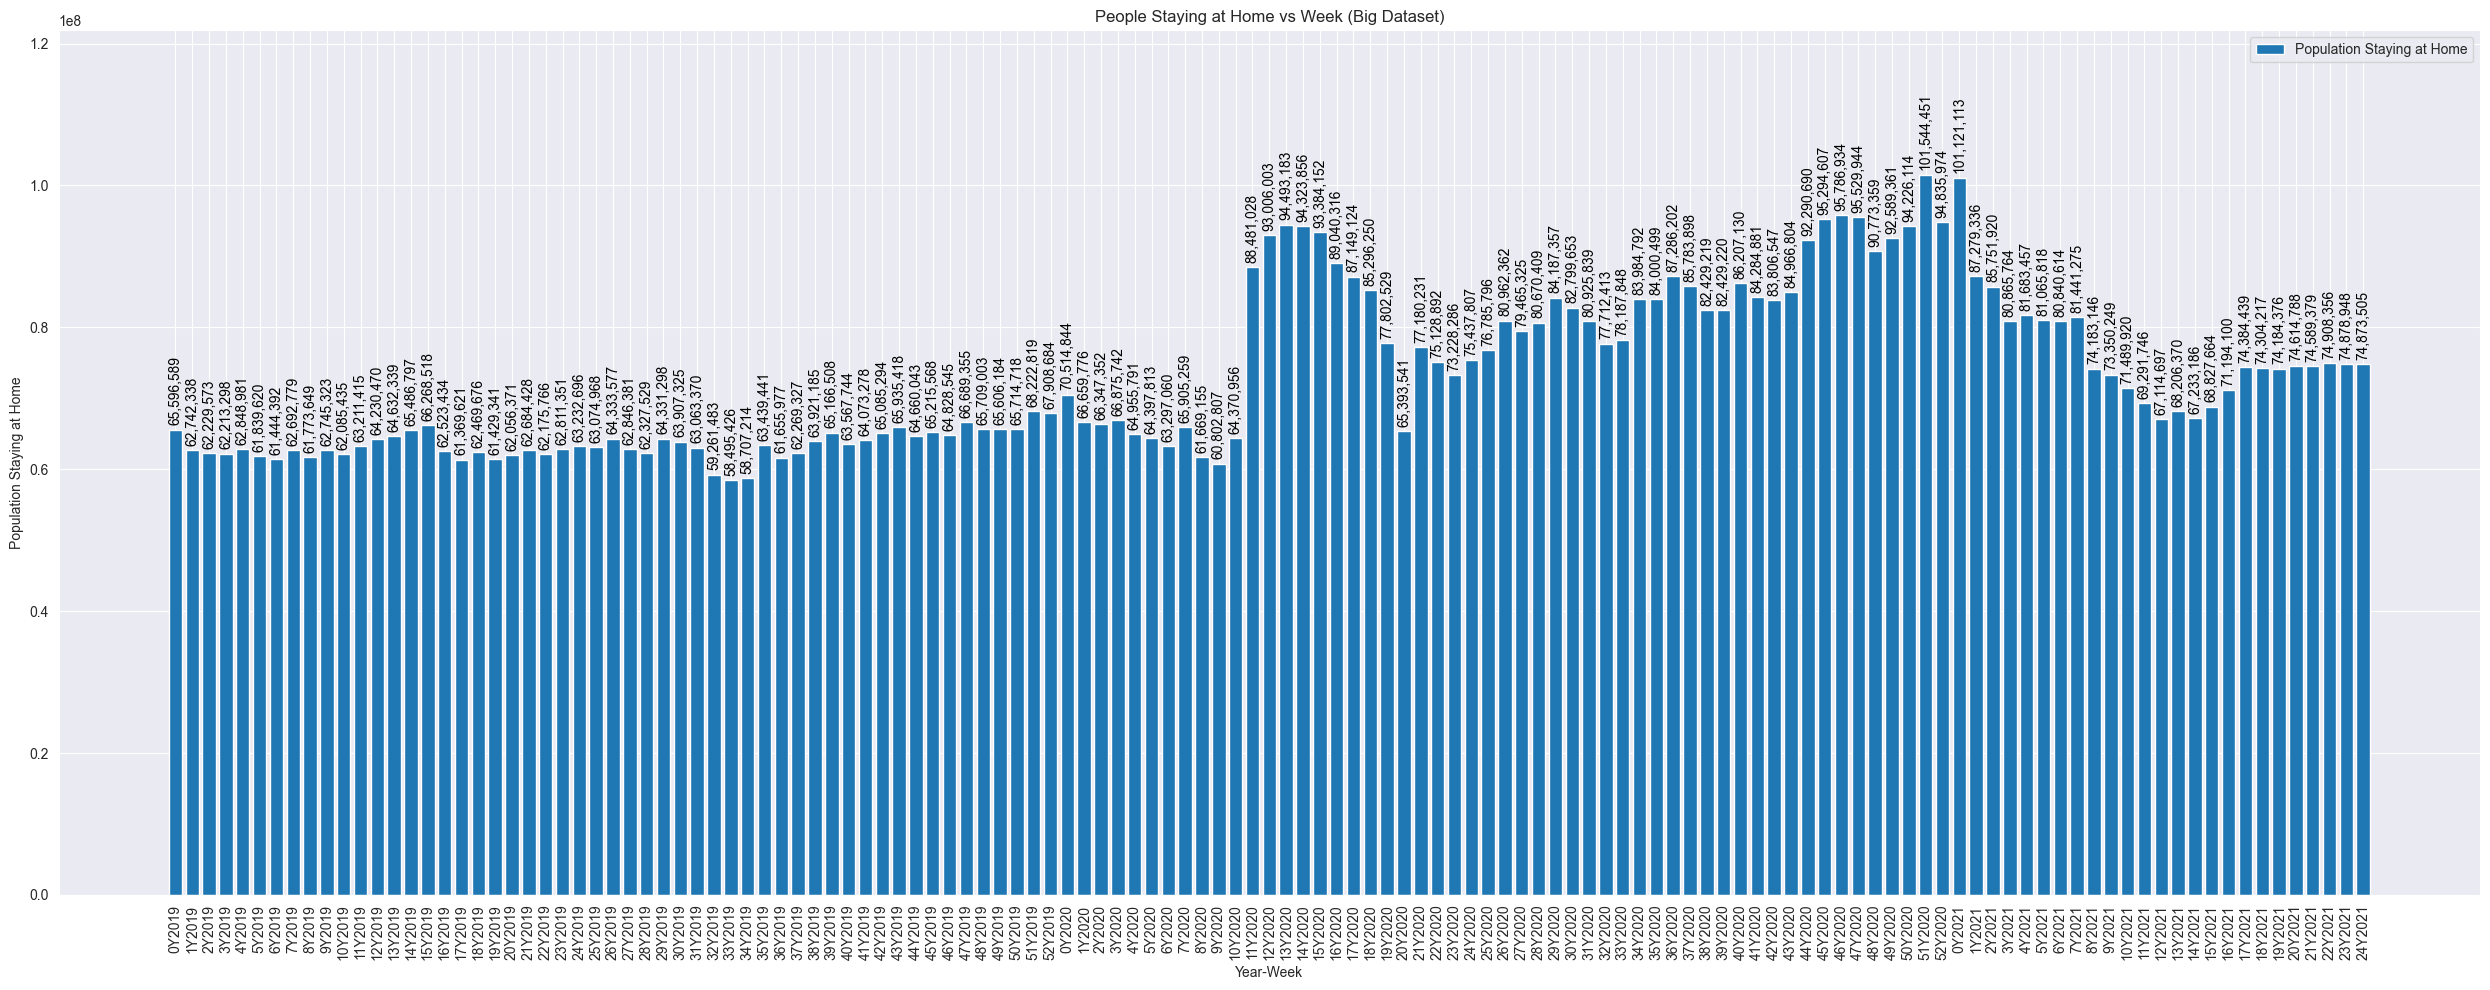

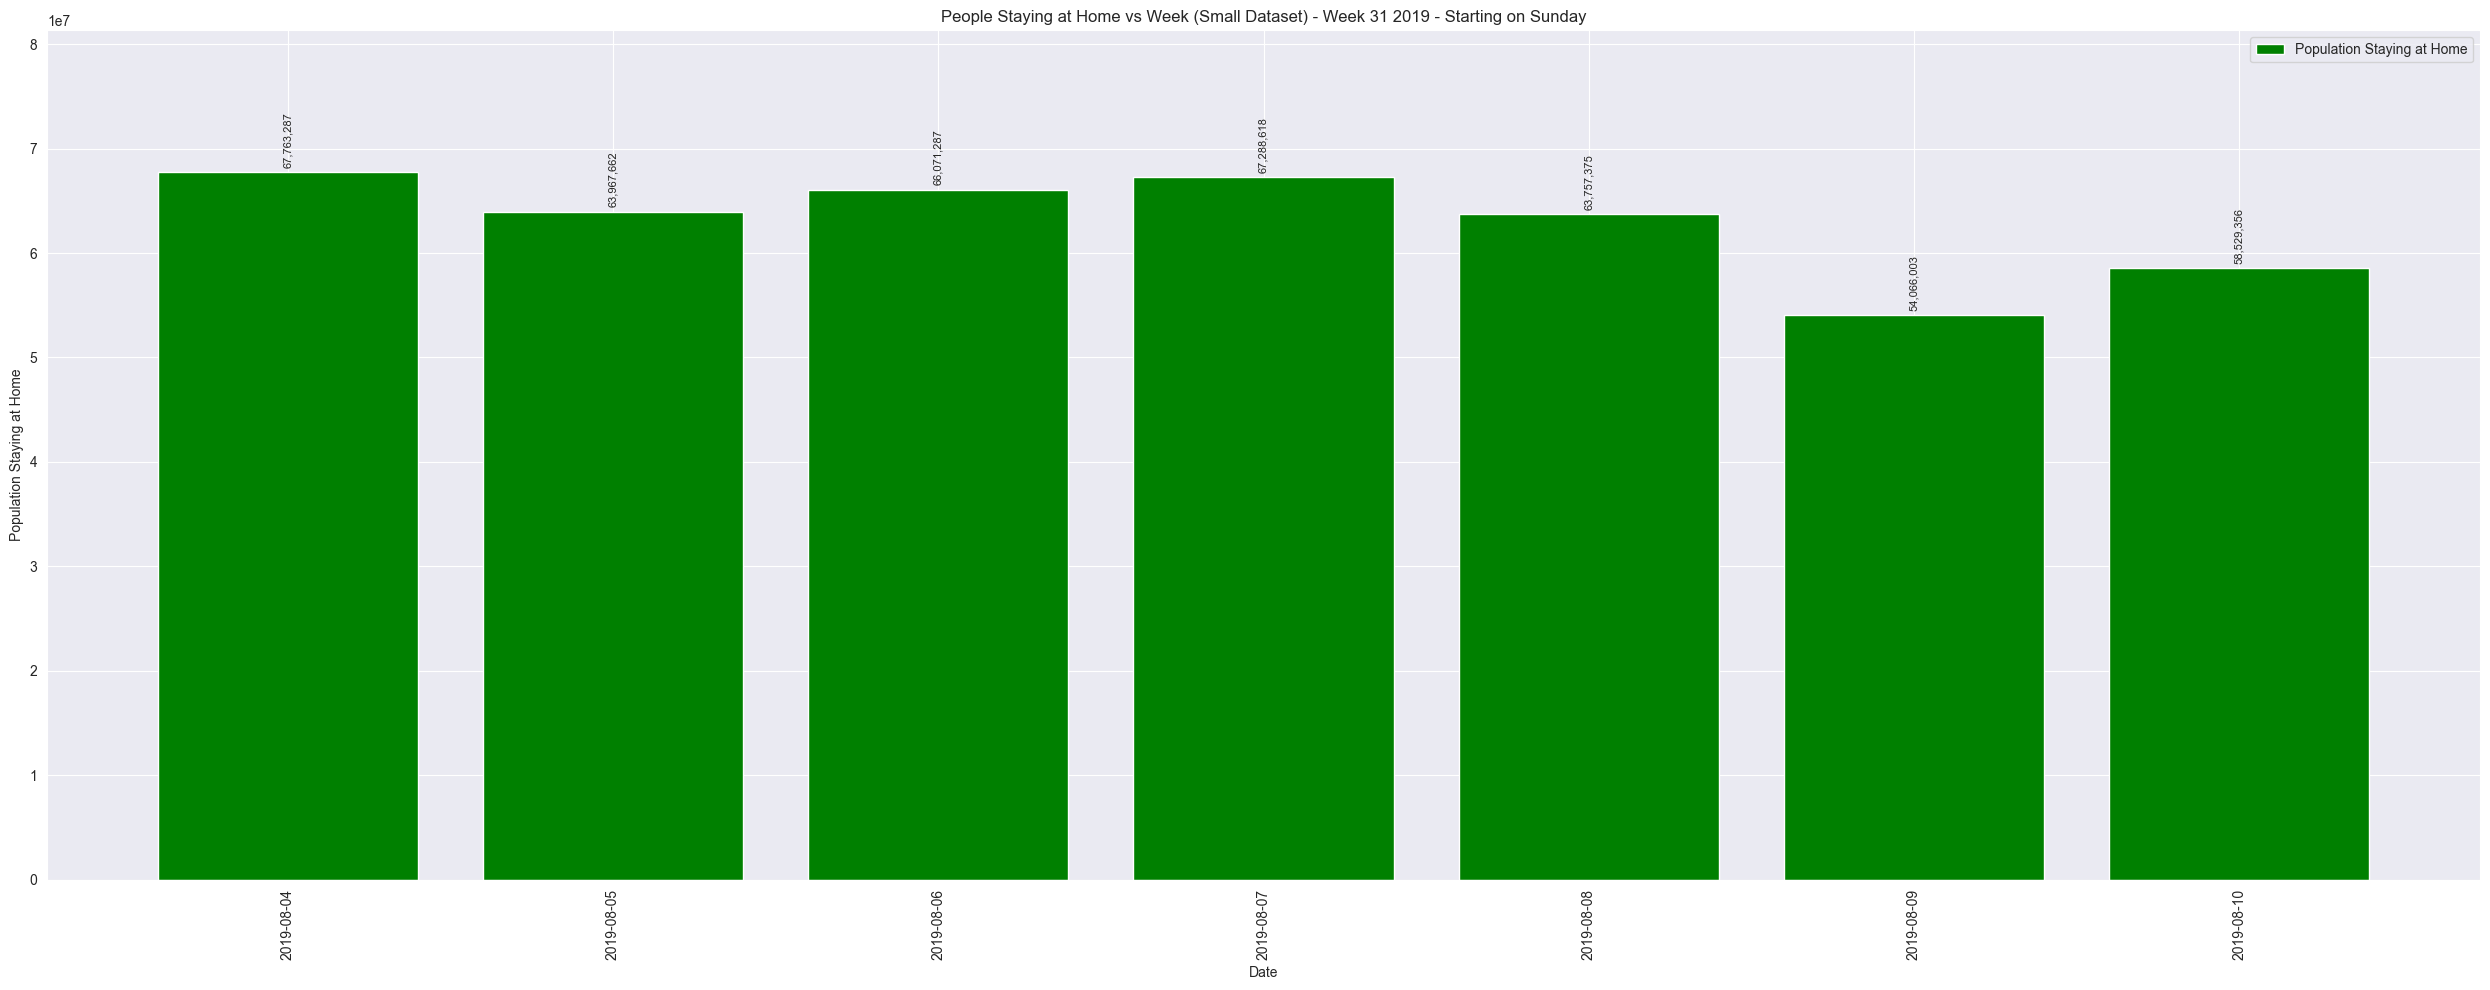

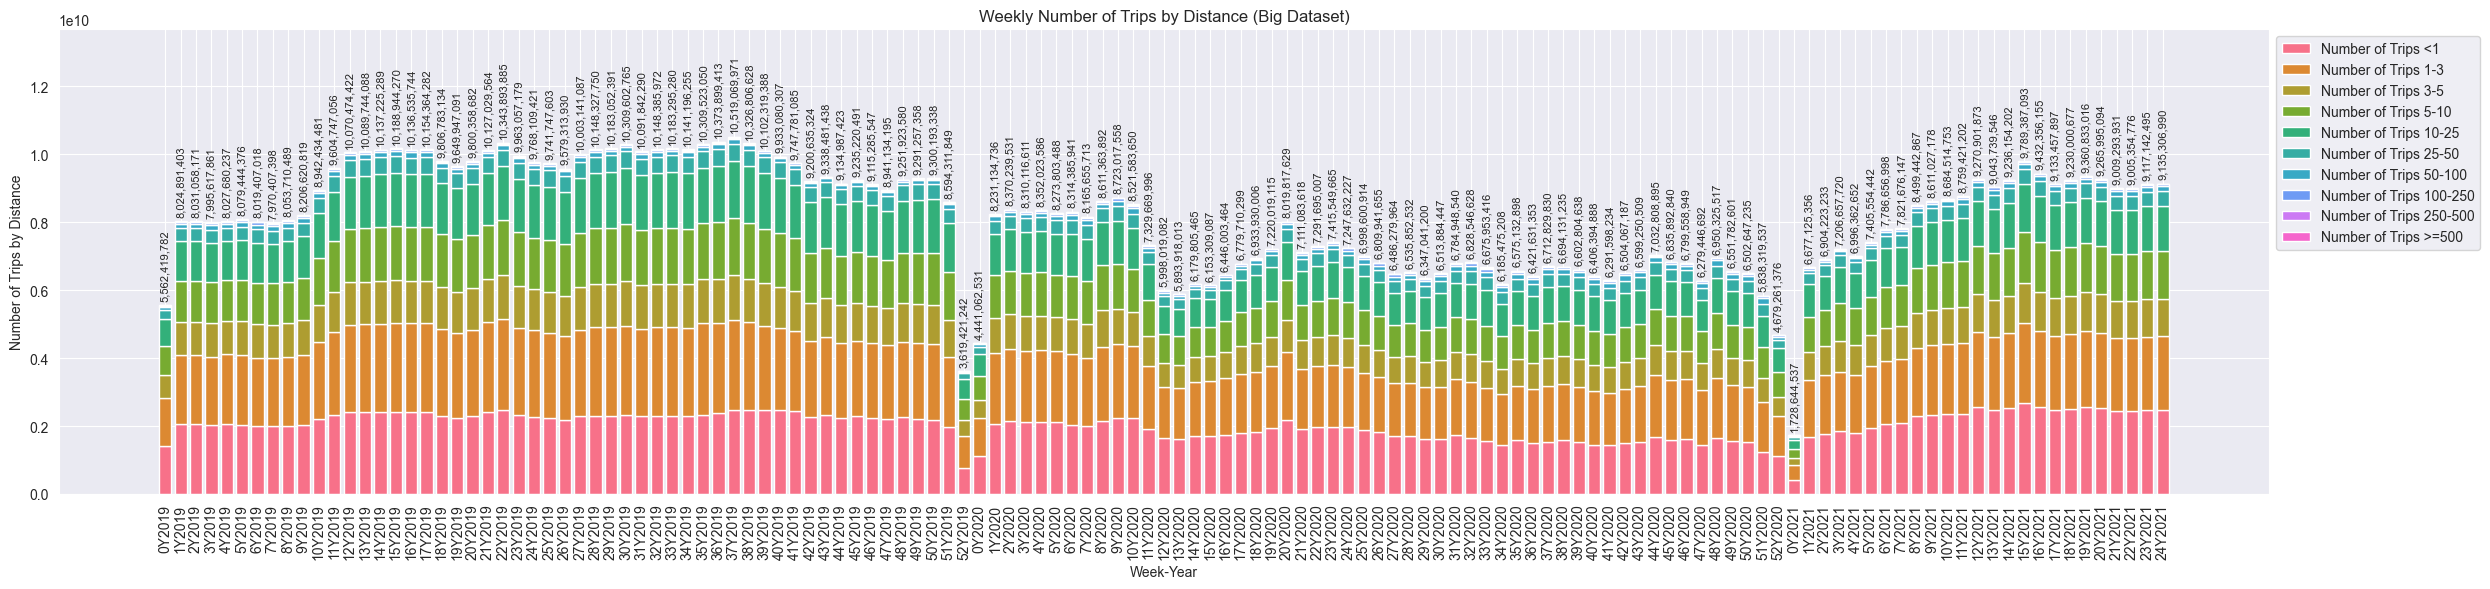

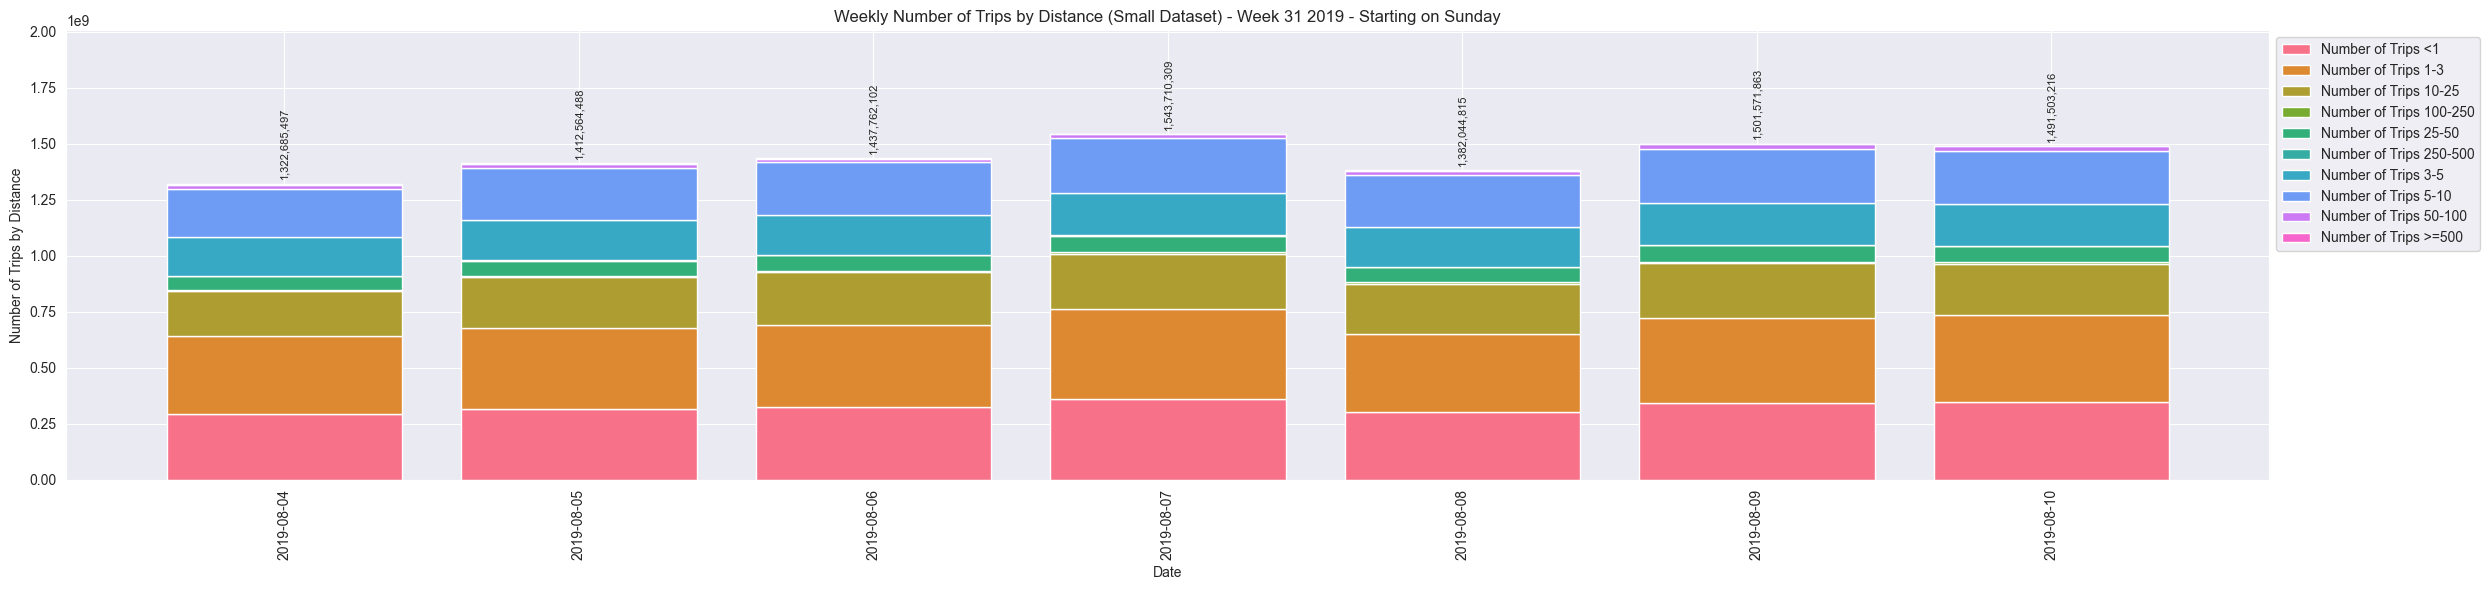

'print(TripsByDistancePandasNationalOnly[(TripsByDistancePandasNationalOnly[\'Week\'] == 31) & (TripsByDistancePandasNationalOnly[\'Date\'].dt.year == 2019)][\'Population Staying at Home\'].mean())\nprint(TripsFullDataPandasNationalOnly[\'Population Staying at Home\'].mean())\nprint(TripsByDistancePandasNationalOnly[TripsByDistancePandasNationalOnly["Date"].between(TripsFullDataPandasNationalOnly[\'Date\'].min(), TripsFullDataPandasNationalOnly[\'Date\'].max())][\'Population Staying at Home\'].mean())'

In [875]:
import seaborn as sns  # Importing seaborn for 4th graph

colors = sns.color_palette("husl", len(trip_columns))

# First graph - How many people stay over weeks? Big Dataset
fig, ax = plt.subplots(figsize=(25, 10))
bars = ax.bar(
    TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Week-Year'],
    TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Mean'],
    label='Population Staying at Home'
)

# First graph - Adding values to the columns
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', rotation=90,
                color='black')

ax.set_ylim(0, TripsByDistancePandasNationalOnlyWeeklyPopulationAtHome['Mean'].max() * 1.2)
ax.set_xlabel('Year-Week')
ax.set_ylabel('Population Staying at Home')
ax.set_title('People Staying at Home vs Week (Big Dataset)')
ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
plt.close('all')

# Second graph - How many people stay over weekdays? Small Dataset
# Week 31 (Starting from 0)
fig, ax = plt.subplots(figsize=(25, 10))
bars = ax.bar(
    TripsFullDataPandasNationalOnly['Date'],
    TripsFullDataPandasNationalOnly['Population Staying at Home'],
    label='Population Staying at Home',
    color='green'
)
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{int(height):,}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=8, rotation=90
    )
ax.set_ylim(0, TripsFullDataPandasNationalOnly['Population Staying at Home'].max() * 1.2)
ax.set_xlabel('Date')
ax.set_ylabel('Population Staying at Home')
ax.set_title('People Staying at Home vs Week (Small Dataset) - Week 31 2019 - Starting on Sunday')
ax.tick_params(axis='x', rotation=90)
ax.legend()
plt.tight_layout()
plt.show()
plt.close('all')

# Third graph - How far is people going - Big Dataset
fig, ax = plt.subplots(figsize=(25, 6))
bottom = pd.Series([0] * len(TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling))
for i, col in enumerate(NumberOfTripsTotalColumns):
    ax.bar(TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling["Week-Year"],
           TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling[col], label=col, bottom=bottom, color=colors[i])
    bottom += TripsByDistancePandasNationalOnlyWeeklyPopulationTravelling[col]

for bar, total in enumerate(bottom):
    ax.annotate(f'{int(total):,}',
                xy=(bar, total),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=8, rotation=90)

ax.set_title("Weekly Number of Trips by Distance (Big Dataset)")
ax.set_xlabel("Week-Year")
ax.set_ylabel("Number of Trips by Distance")
ax.set_ylim(0, bottom.max() * 1.3)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
plt.close('all')

# Forth graph - How far is people going - Small Dataset
fig, ax = plt.subplots(figsize=(25, 6))
bottom = pd.Series([0] * len(TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips))

for i, col in enumerate(trip_columns):
    ax.bar(
        TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips['Date'],
        TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips[col],
        label=col,
        bottom=bottom,
        color=colors[i]
    )
    bottom += TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips[col]

for date, total in zip(TripsFullDataPandasNationalOnlyWithoutRedundantNumberTrips['Date'], bottom):
    ax.annotate(
        f'{int(total):,}',
        xy=(date, total),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=8, rotation=90
    )
ax.set_title("Weekly Number of Trips by Distance (Small Dataset) - Week 31 2019 - Starting on Sunday")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Trips by Distance")
ax.set_ylim(0, bottom.max() * 1.3)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
plt.close('all')

# Testing to confirm with different approaches the relationship between Week 31 and Full Data
'''print(TripsByDistancePandasNationalOnly[(TripsByDistancePandasNationalOnly['Week'] == 31) & (TripsByDistancePandasNationalOnly['Date'].dt.year == 2019)]['Population Staying at Home'].mean())
print(TripsFullDataPandasNationalOnly['Population Staying at Home'].mean())
print(TripsByDistancePandasNationalOnly[TripsByDistancePandasNationalOnly["Date"].between(TripsFullDataPandasNationalOnly['Date'].min(), TripsFullDataPandasNationalOnly['Date'].max())]['Population Staying at Home'].mean())'''


b. Identify the dates that > 10000000 people conducted 10-25 Number of Trips and compare them to them that the same number of people (> 10000000) conducted 50-100 Number of trips. 

Finished Data for Graphs Second exercise in 0.00200


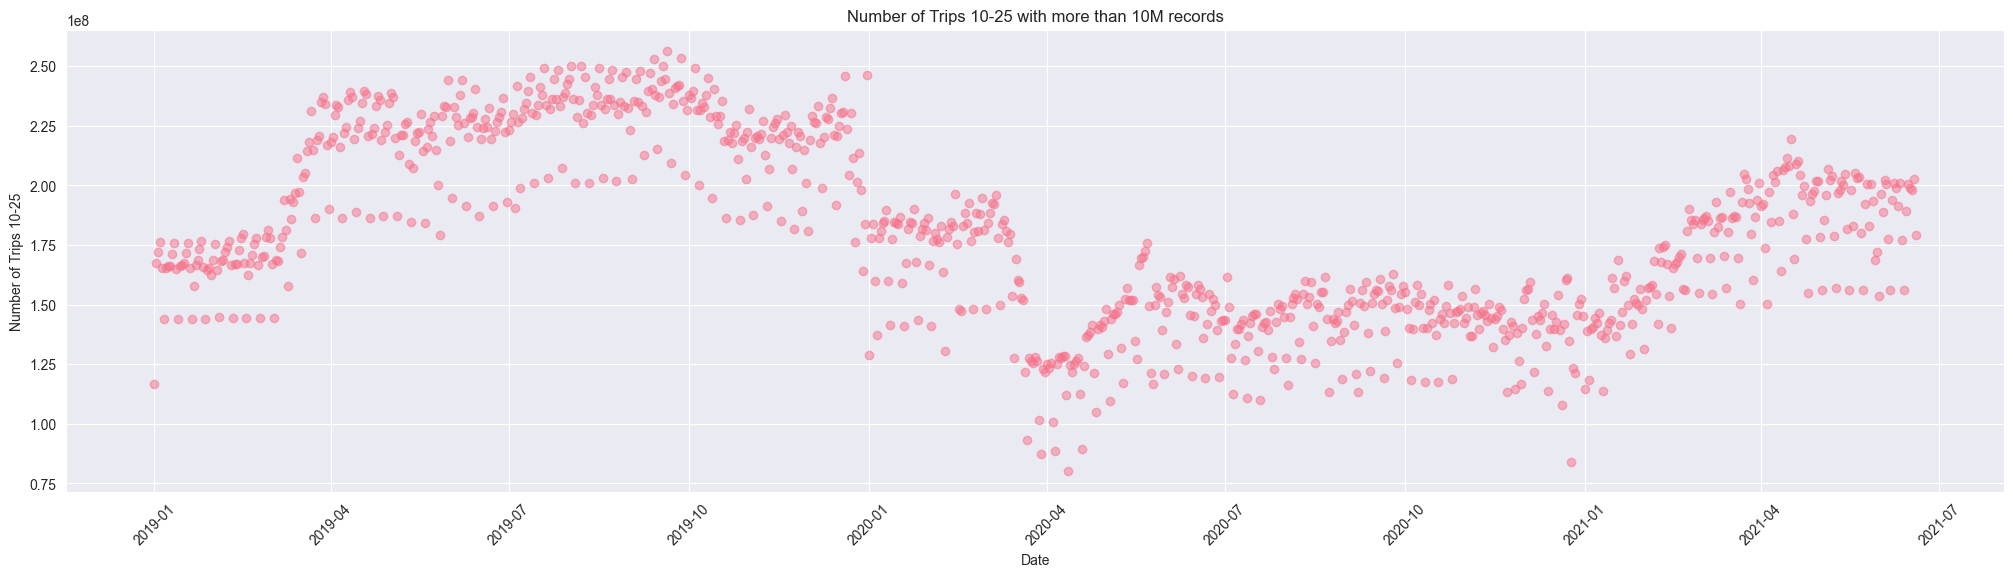

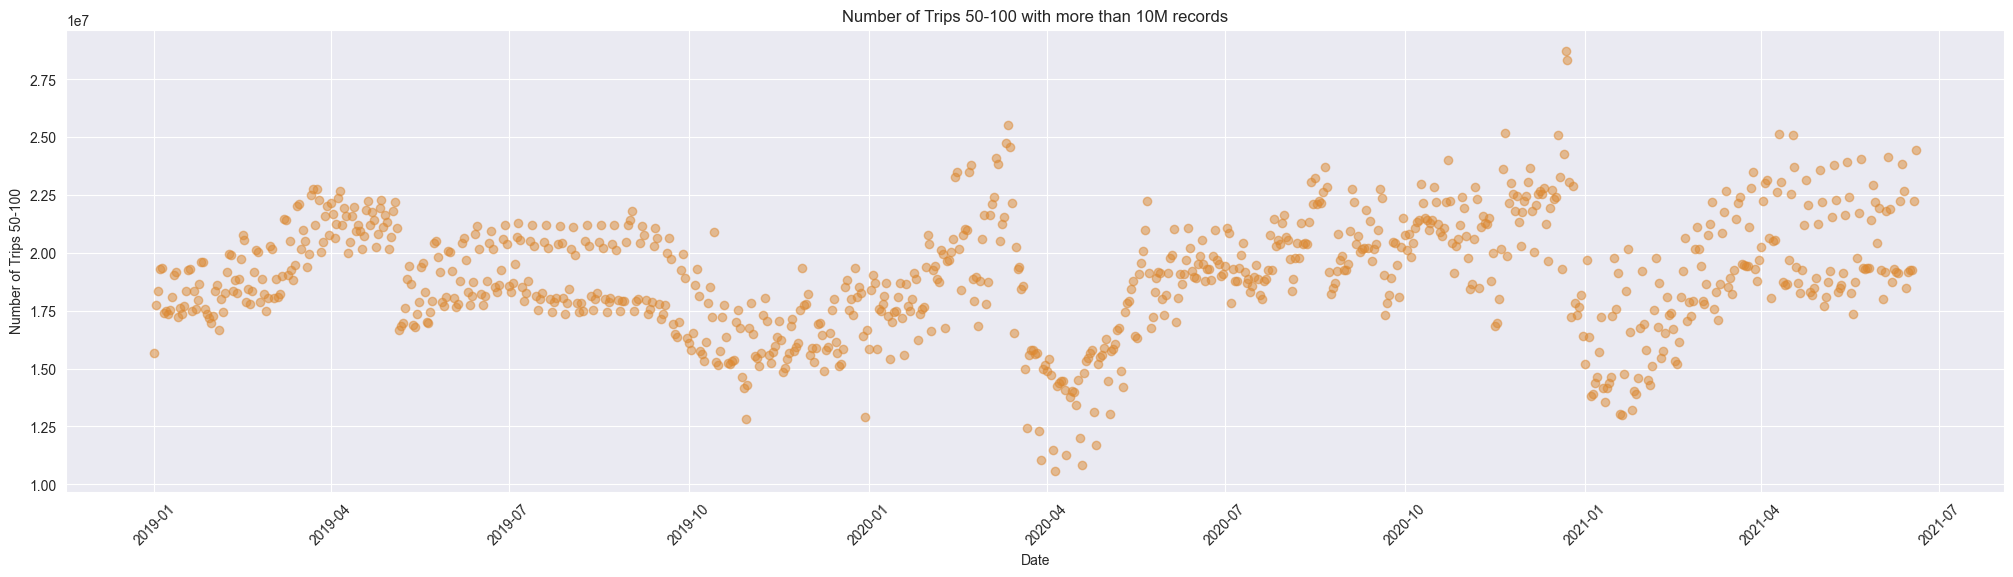

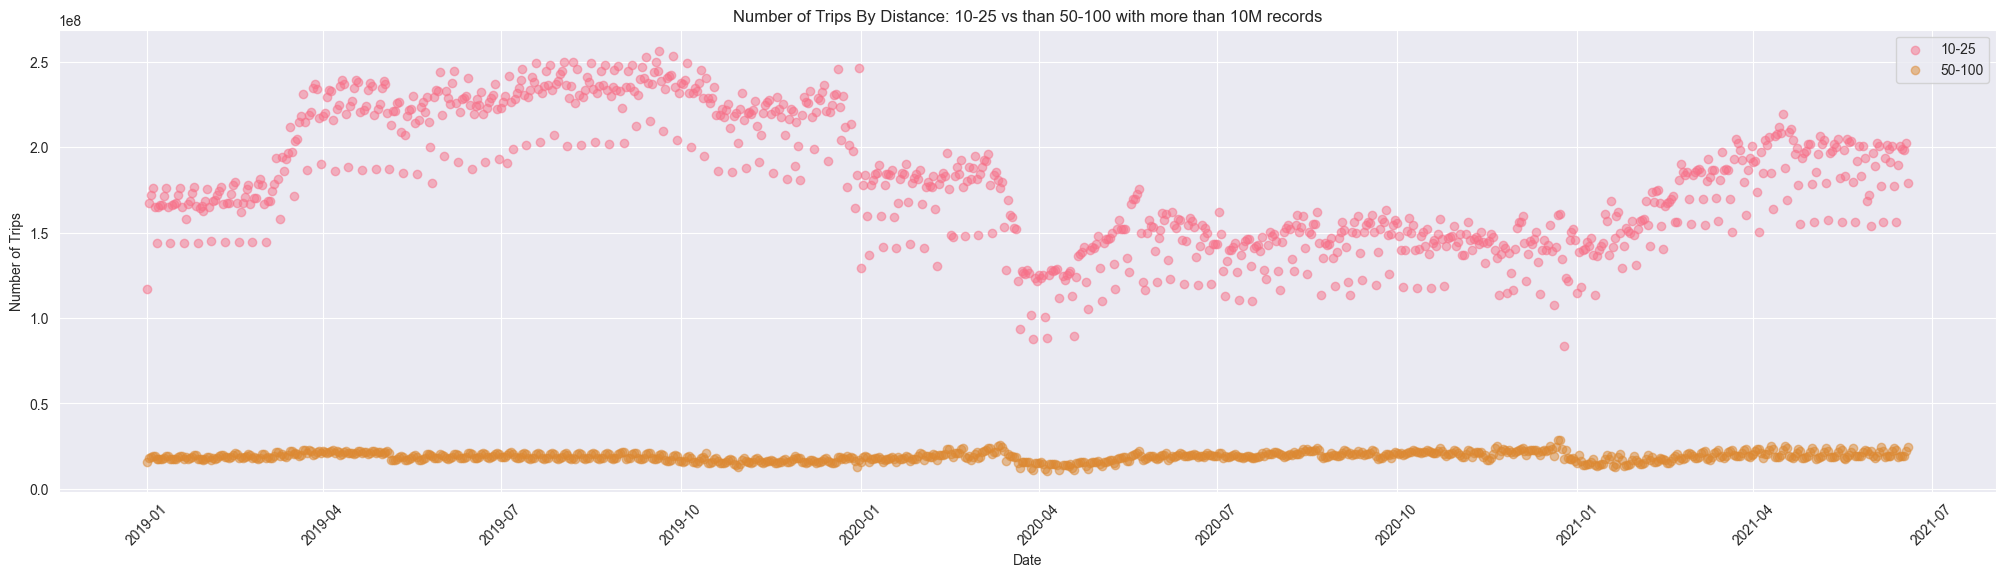

In [876]:
TripsByDistancePandasNationalOnlyMoreThan10000000 = TripsByDistancePandasNationalOnly[
    ['Number of Trips 10-25', 'Number of Trips 50-100', 'Date', 'Week']]
startTime = time.time()
set1 = TripsByDistancePandasNationalOnlyMoreThan10000000[
    TripsByDistancePandasNationalOnlyMoreThan10000000['Number of Trips 10-25'] > 10000000]
set2 = TripsByDistancePandasNationalOnlyMoreThan10000000[
    TripsByDistancePandasNationalOnlyMoreThan10000000['Number of Trips 50-100'] > 10000000]
set3 = TripsByDistancePandasNationalOnlyMoreThan10000000[
    (TripsByDistancePandasNationalOnlyMoreThan10000000['Number of Trips 10-25'] > 10000000) & (
                TripsByDistancePandasNationalOnlyMoreThan10000000['Number of Trips 50-100'] > 10000000)]
pandasTime = time.time() - startTime
print(f"Finished Data for Graphs Second exercise in {pandasTime:.5f}")

# Plot the results Set 1
fig, ax = plt.subplots(figsize=(25, 6))
plt.scatter(set1['Date'], set1['Number of Trips 10-25'], color=colors[0], alpha=0.5)
plt.title('Number of Trips 10-25 with more than 10M records')
plt.xlabel('Date')
plt.ylabel('Number of Trips 10-25')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./DataSources/GraphicalAnswers/Number of Trips 10-25.png")
plt.show()
plt.close('all')

# Plot the results Set 2
fig, ax = plt.subplots(figsize=(25, 6))
plt.scatter(set2['Date'], set2['Number of Trips 50-100'], color=colors[1], alpha=0.5)
plt.title('Number of Trips 50-100 with more than 10M records')
plt.xlabel('Date')
plt.ylabel('Number of Trips 50-100')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./DataSources/GraphicalAnswers/Number of Trips 50-100.png")
plt.show()
plt.close('all')

# Plot the results Set 3
fig, ax = plt.subplots(figsize=(25, 6))

plt.scatter(set3['Date'], set3['Number of Trips 10-25'], color=colors[0], alpha=0.5, label='10-25')
plt.scatter(set3['Date'], set3['Number of Trips 50-100'], color=colors[1], alpha=0.5, label='50-100')

plt.title('Number of Trips By Distance: 10-25 vs than 50-100 with more than 10M records')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("./DataSources/GraphicalAnswers/Trips 10-25 vs 50-100.png")
plt.show()
plt.close('all')


c) Please consider that the data are analysed using 10 and 20 processors (Only applying to graphs executed with Big Dataset)

First exercise (a): Running the Big Dataset with 10 processors
Finished Data for Graph 1 First exercise (a) in 0.00798 seconds
Finished Data for Graph 3 First exercise (a) in 1.15425 seconds


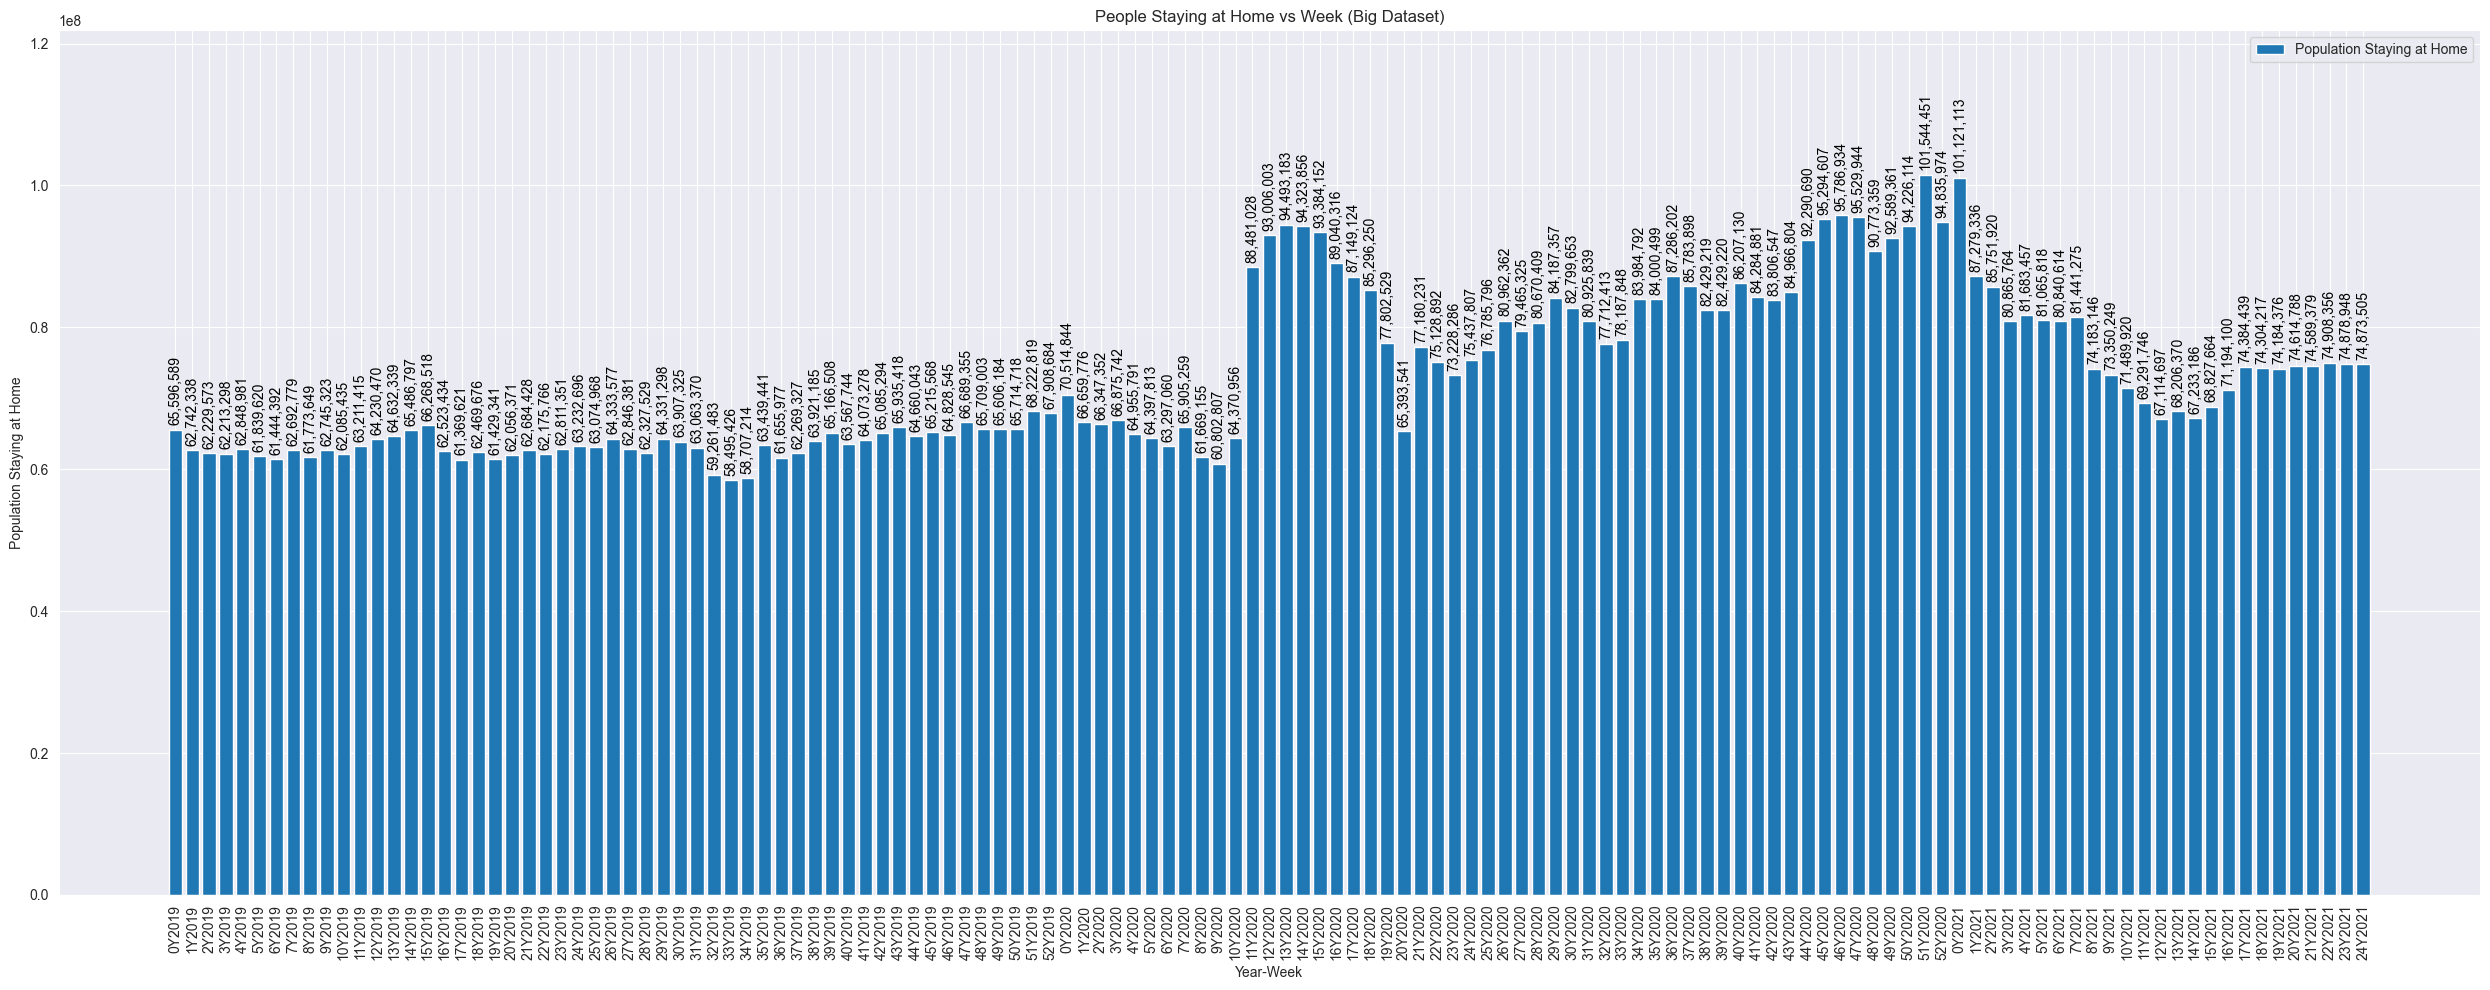

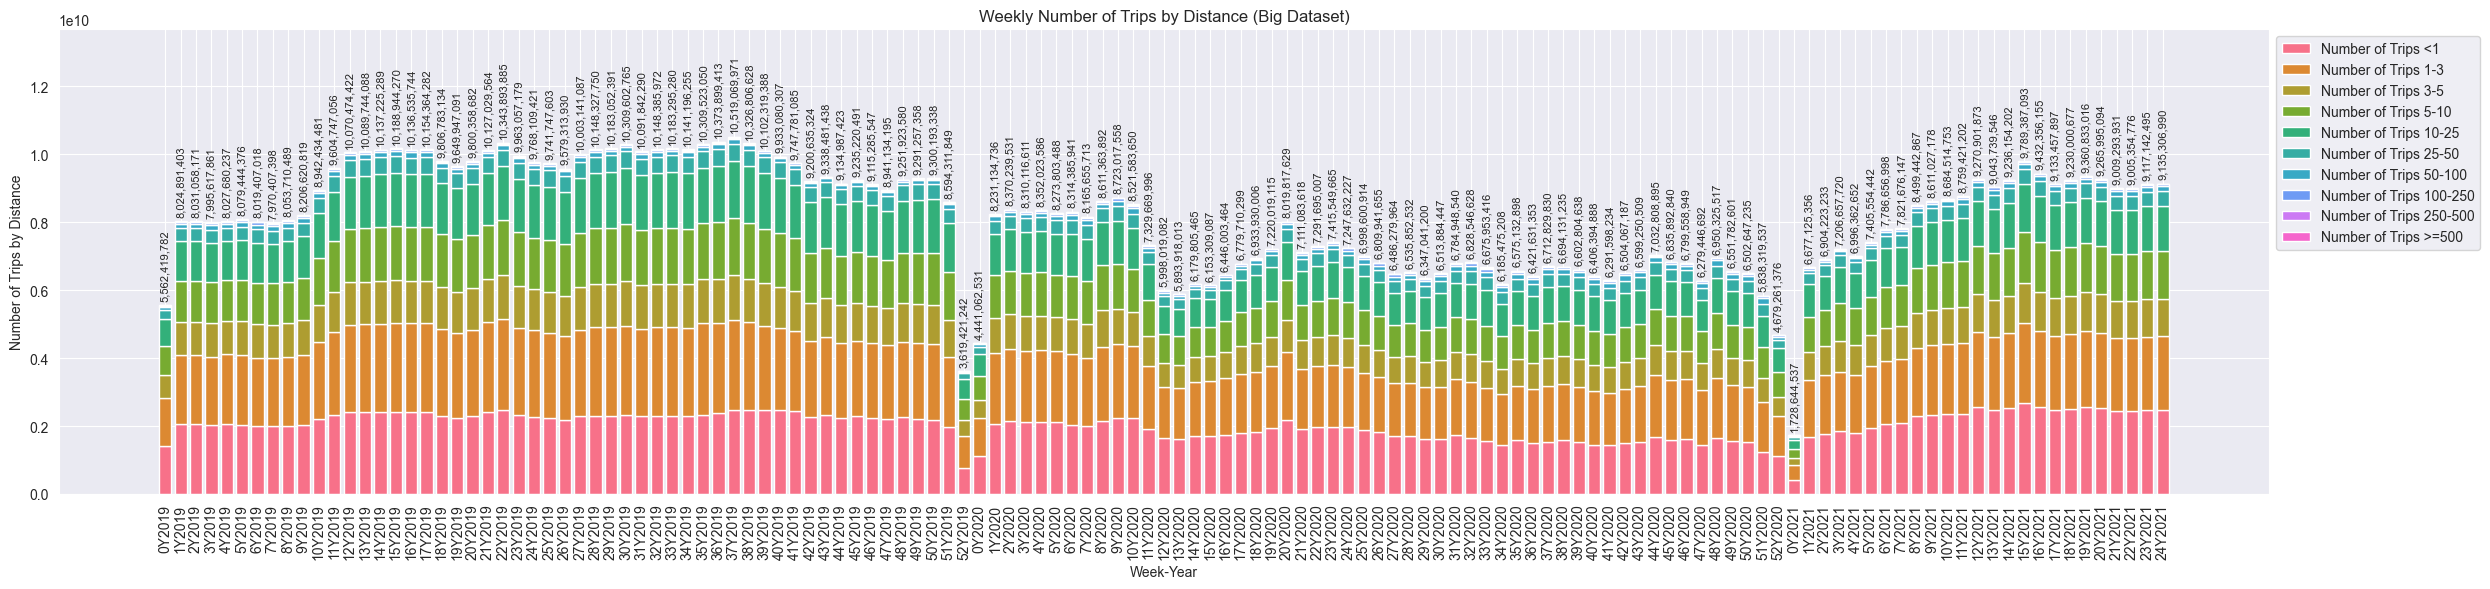

First exercise (a): Running the Big Dataset with 20 processors
Finished Data for Graph 1 First exercise (a) in 0.00200 seconds
Finished Data for Graph 3 First exercise (a) in 1.58740 seconds


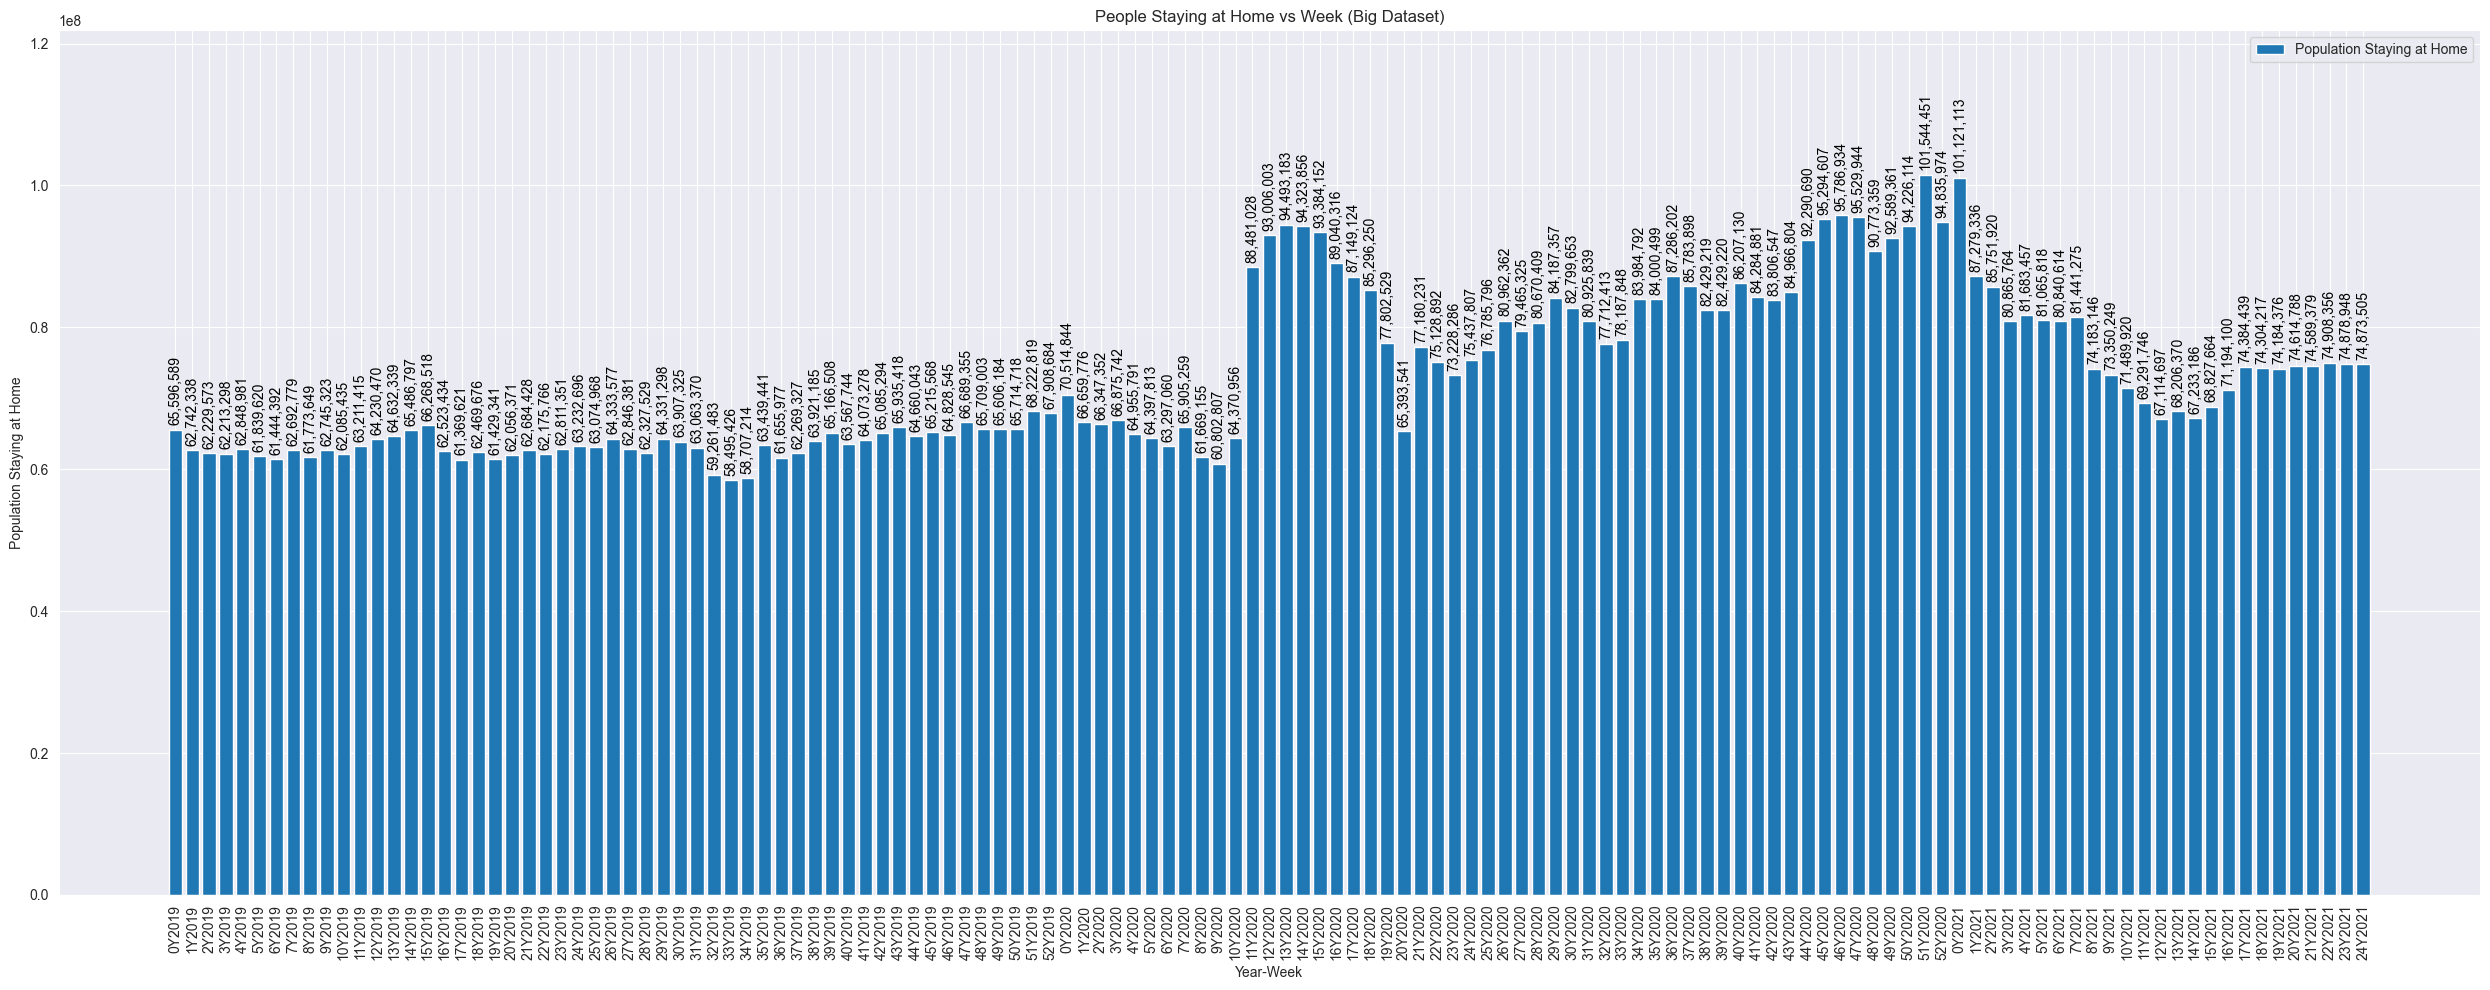

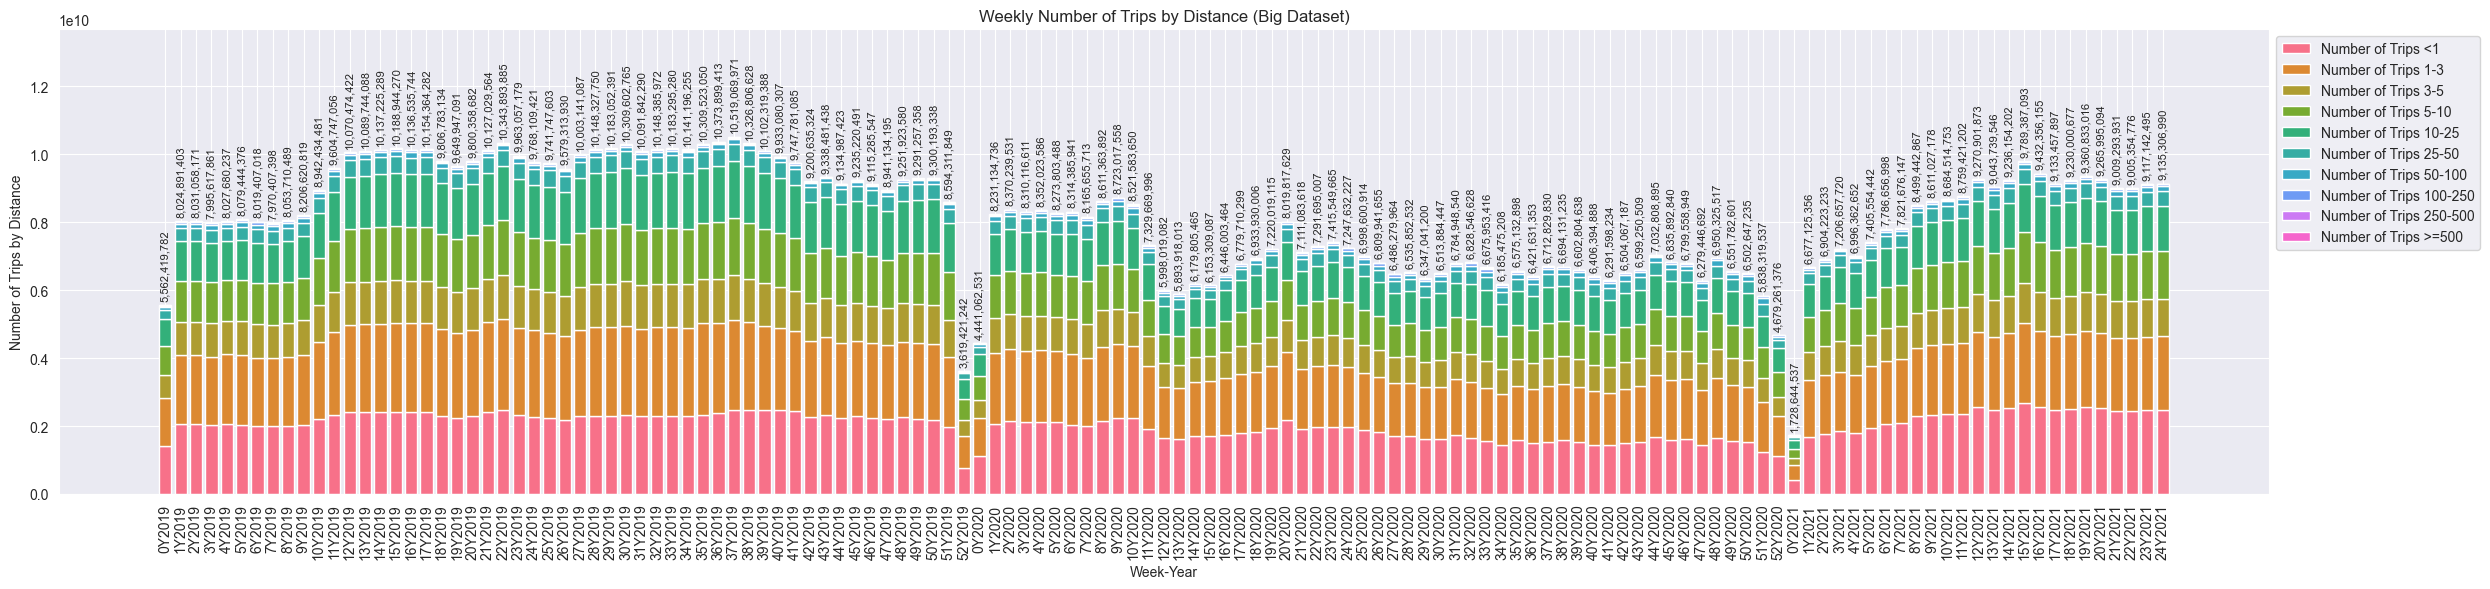

Second exercise (b): Running the Big Dataset with 10 processors
Finished Data for Graphs Second exercise in 0.60614 seconds


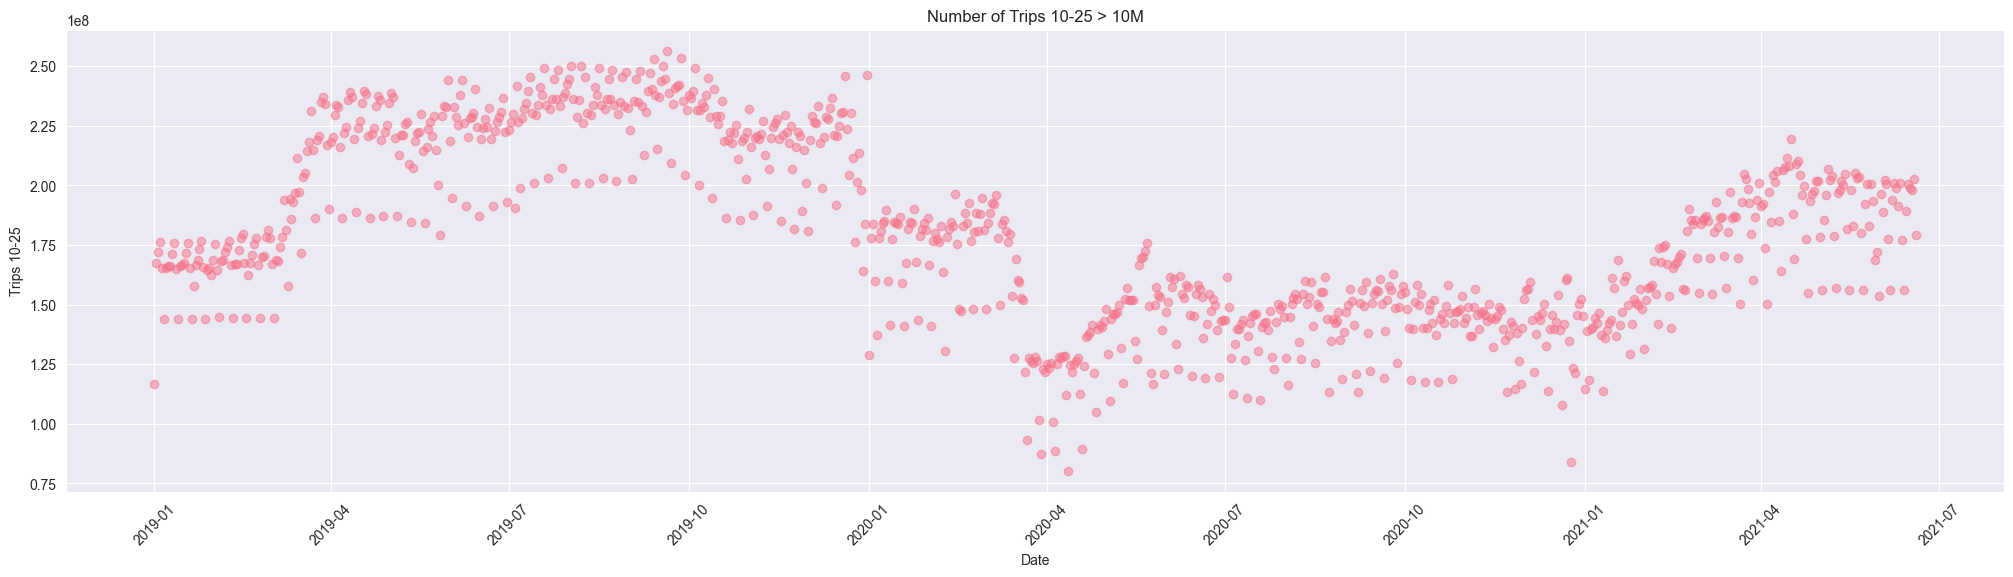

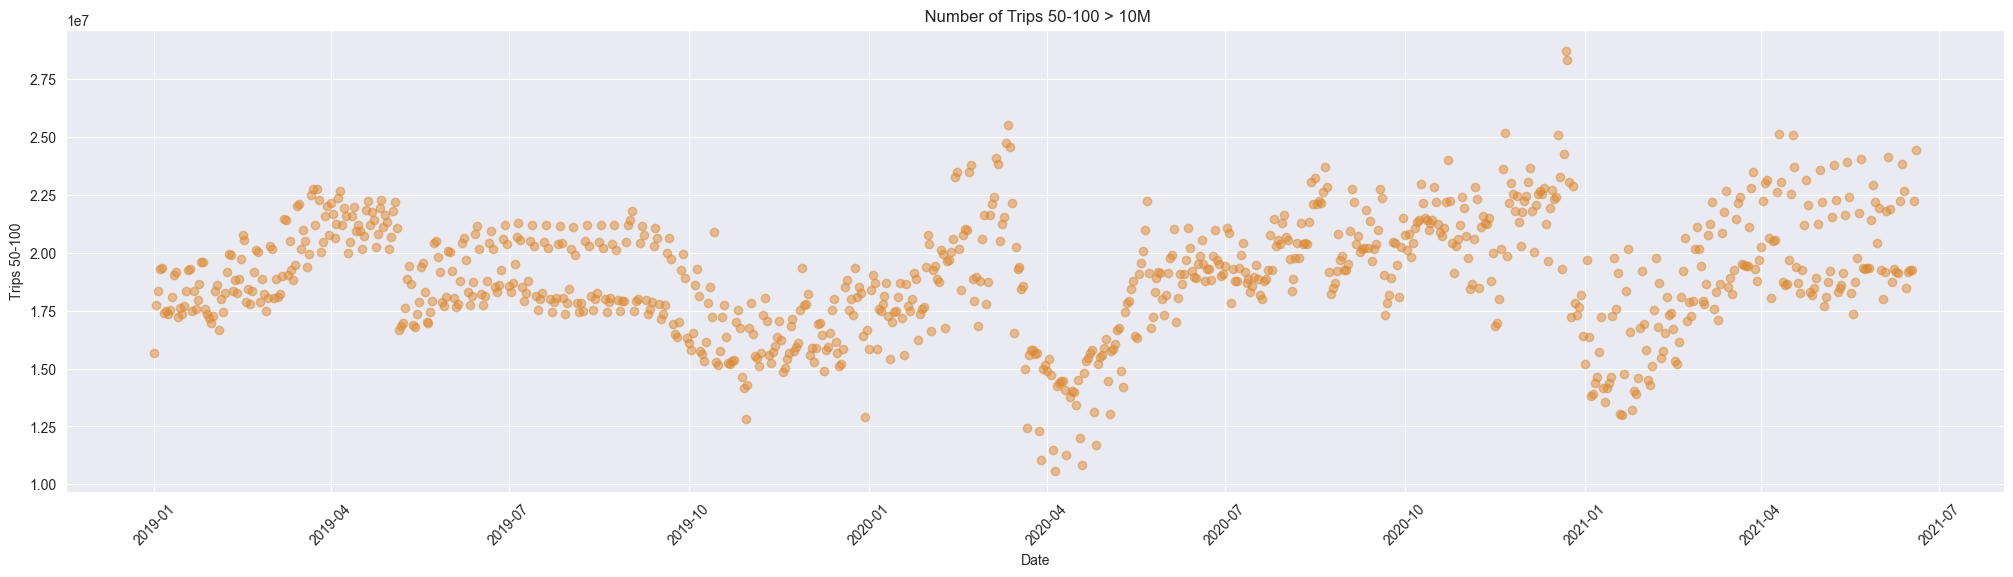

Second exercise (b): Running the Big Dataset with 20 processors
Finished Data for Graphs Second exercise in 0.64106 seconds


2025-04-17 10:39:30,376 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:53460'.


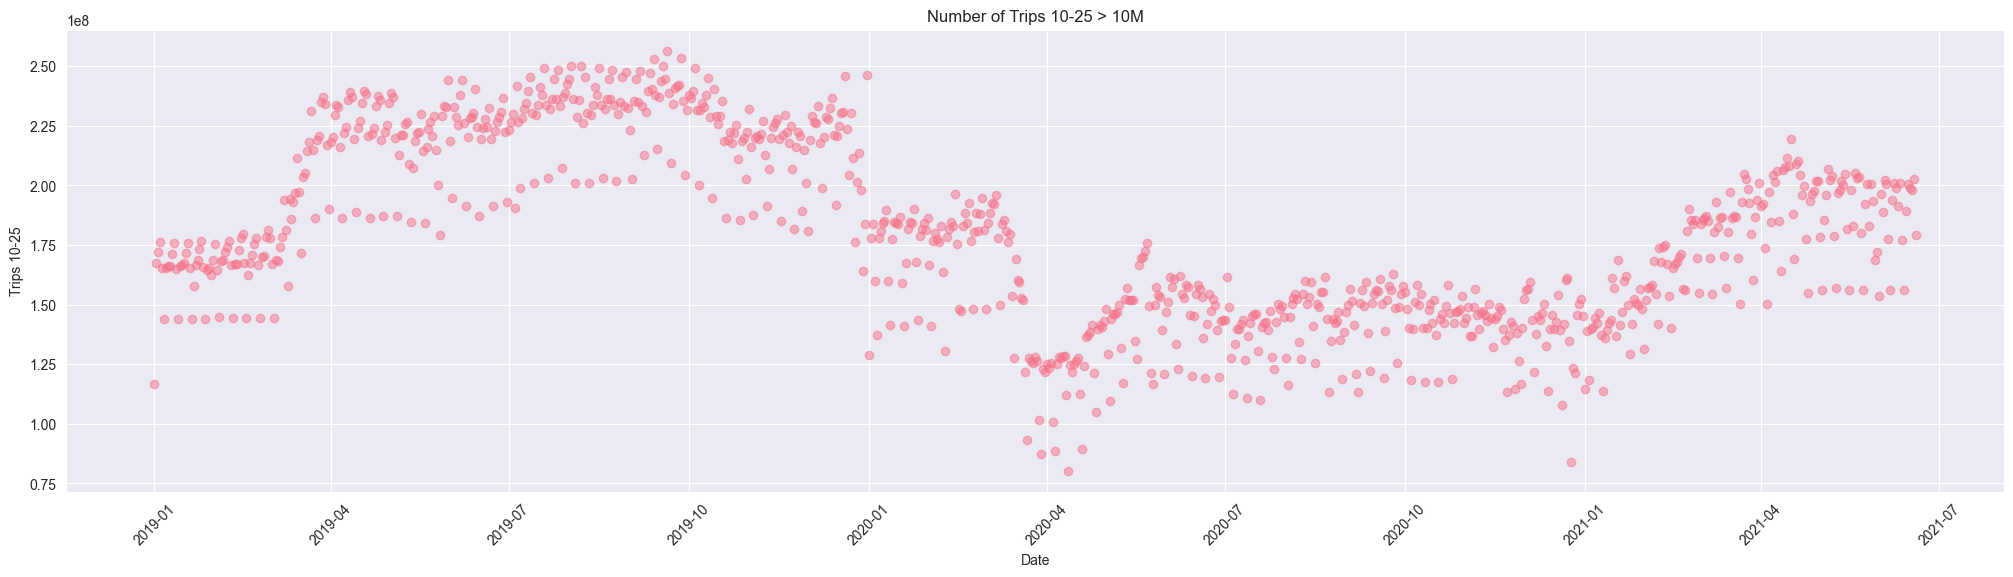

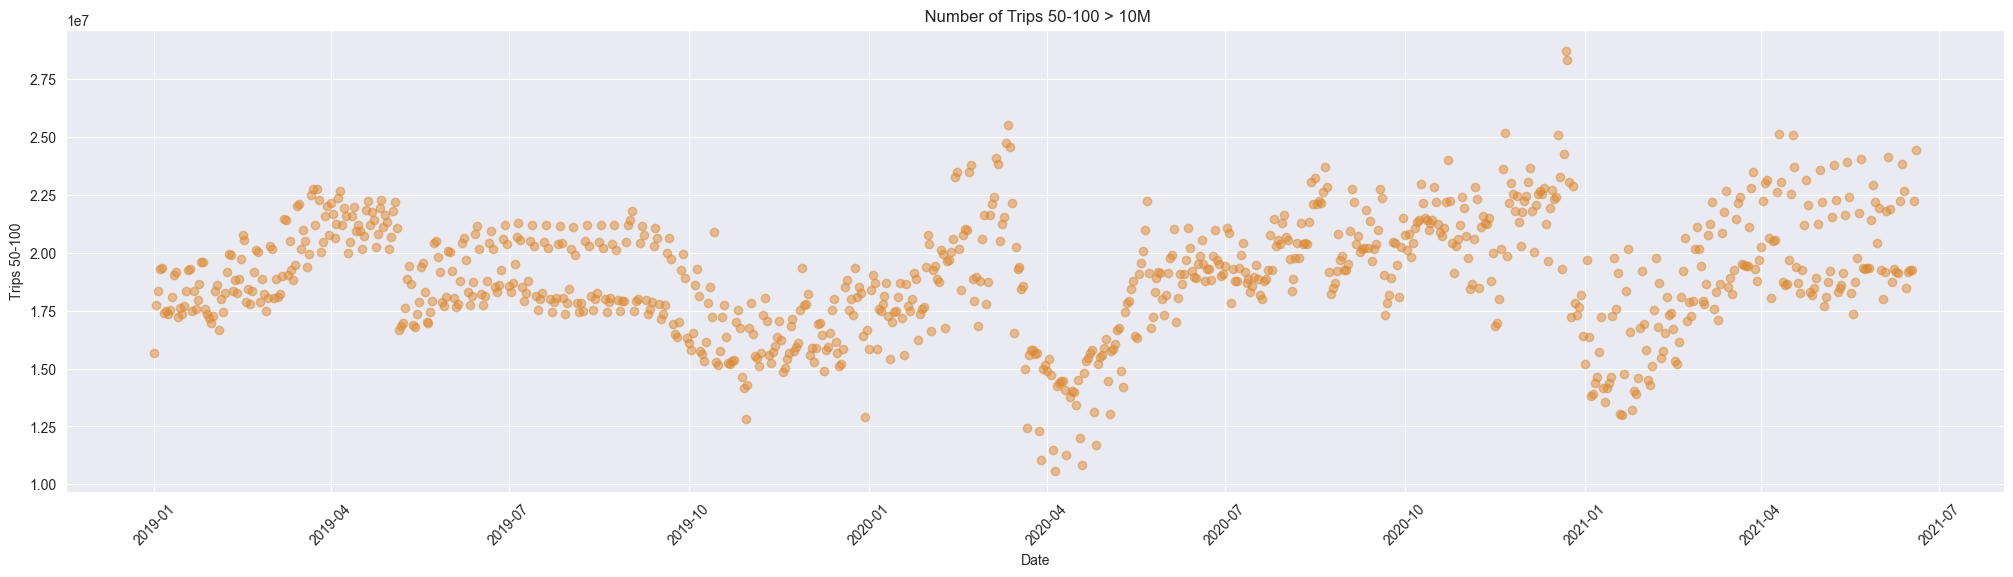

In [877]:
numberProcessors = [10, 20]

for processor in numberProcessors:
    print(f"First exercise (a): Running the Big Dataset with {processor} processors")

    with LocalCluster(n_workers=processor, threads_per_worker=1) as cluster:
        with Client(cluster) as client:
            # Data for Graph 1 First exercise (a): Population Staying at Home Weekly - Big Dataset
            TripsDask = dd.from_pandas(TripsByDistancePandasNationalOnly, npartitions=2)
            TripsDaskFiltered = TripsDask[['Population Staying at Home', 'Week', 'Date']]
            TripsDaskFiltered['Month'] = TripsDaskFiltered['Date'].dt.month
            TripsDaskFiltered['Year'] = TripsDaskFiltered['Date'].dt.year  # Specifying a column as Year
            pd.set_option('display.max_rows', None)  # Display of max rows for testing
            startTime = time.time()
            set1 = TripsDaskFiltered.groupby([TripsDaskFiltered['Week'], TripsDaskFiltered['Year']])[
                'Population Staying at Home'].mean().reset_index()
            set1.columns = ['Week', 'Year', 'Mean']
            set1 = set1.sort_values(['Year', 'Week'])
            set1['Week-Year'] = set1['Week'].astype(str) + "Y" + set1['Year'].astype(str)  # Adding a specific column for Week-Year
            daskTime = time.time() - startTime
            print(f"Finished Data for Graph 1 First exercise (a) in {daskTime:.5f} seconds")
            
            # Data for Graph 3 First exercise (a): Trips By Distance - Big Dataset
            TripsDask = dd.from_pandas(TripsByDistancePandasNationalOnly, npartitions=2)
            TripsDaskFiltered = TripsDask.drop(['Number of Trips'], axis=1) 
            NumberOfTripsTotalColumns = [col for col in TripsDaskFiltered.columns if col.startswith("Number of Trips")]
            startTime = time.time()
            set2 = TripsDaskFiltered.groupby(['Year', 'Week'])[NumberOfTripsTotalColumns].sum().reset_index()
            set2['Week-Year'] = set2['Week'].astype(str) + "Y" + set2['Year'].astype(str)  # Adding a specific column for Week-Year
            set2ToPd = set2.compute()            
            daskTime = time.time() - startTime
            print(f"Finished Data for Graph 3 First exercise (a) in {daskTime:.5f} seconds")
            
            set1ToPd = set1.compute()
            set2ToPd = set2.compute()
            
    # First graph visualization
    fig, ax = plt.subplots(figsize=(25, 10))
    bars = ax.bar(
        set1ToPd['Week-Year'],
        set1ToPd['Mean'],
        label='Population Staying at Home'
    )
            
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90,
                    color='black')
    
    ax.set_ylim(0, set1ToPd['Mean'].max() * 1.2)
    ax.set_xlabel('Year-Week')
    ax.set_ylabel('Population Staying at Home')
    ax.set_title('People Staying at Home vs Week (Big Dataset)')
    ax.tick_params(axis='x', rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()
    plt.close('all')

    # Third graph - How far is people going - Big Dataset
    fig, ax = plt.subplots(figsize=(25, 6))
    bottom = pd.Series([0] * len(set2ToPd))
    for i, col in enumerate(NumberOfTripsTotalColumns):
        ax.bar(set2ToPd["Week-Year"],set2ToPd[col], label=col, bottom=bottom, color=colors[i])
        bottom += set2ToPd[col]
    
    for bar, total in enumerate(bottom):
        ax.annotate(f'{int(total):,}',
                    xy=(bar, total),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8, rotation=90)
    
    ax.set_title("Weekly Number of Trips by Distance (Big Dataset)")
    ax.set_xlabel("Week-Year")
    ax.set_ylabel("Number of Trips by Distance")
    ax.set_ylim(0, bottom.max() * 1.3)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    plt.close('all')
            
            


for processor in numberProcessors:
    print(f"Second exercise (b): Running the Big Dataset with {processor} processors")

    with LocalCluster(n_workers=processor, threads_per_worker=1) as cluster:
        with Client(cluster) as client:
            TripsDask = dd.from_pandas(TripsByDistancePandasNationalOnly, npartitions=2)
            TripsDaskFiltered = TripsDask[['Number of Trips 10-25', 'Number of Trips 50-100', 'Date', 'Week']]

            startTime = time.time()

            set1 = TripsDaskFiltered[TripsDaskFiltered['Number of Trips 10-25'] > 10000000]
            set2 = TripsDaskFiltered[TripsDaskFiltered['Number of Trips 50-100'] > 10000000]
            set3 = TripsDaskFiltered[
                (TripsDaskFiltered['Number of Trips 10-25'] > 10000000) &
                (TripsDaskFiltered['Number of Trips 50-100'] > 10000000)
                ]

            set1ToPd = set1.compute()
            set2ToPd = set2.compute()
            set3ToPd = set3.compute()

            daskTime = time.time() - startTime
            print(f"Finished Data for Graphs Second exercise in {daskTime:.5f} seconds")
            
    fig, ax = plt.subplots(figsize=(25, 6))
    plt.scatter(set1ToPd['Date'], set1ToPd['Number of Trips 10-25'], color=colors[0], alpha=0.5)
    plt.title("Number of Trips 10-25 > 10M")
    plt.xlabel("Date")
    plt.ylabel("Trips 10-25")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    plt.savefig(f"./DataSources/GraphicalAnswers/Trips 10-25 nprocessors Dask.png")
    plt.close()
    
    fig, ax = plt.subplots(figsize=(25, 6))
    plt.scatter(set2ToPd['Date'], set2ToPd['Number of Trips 50-100'], color=colors[1], alpha=0.5)
    plt.title(" Number of Trips 50-100 > 10M")
    plt.xlabel("Date")
    plt.ylabel("Trips 50-100")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    plt.savefig("./DataSources/GraphicalAnswers/Trips 50-100 nprocessors Dask.png")
    plt.close()

    
    

    

0.8847988834955153
coefficient of determination: 0.8847988834955153
intercept: [-29578070.61410797]
coefficients: [[0.39294233]]
predicted response:
[[3.37806437e+08]
 [3.62131699e+08]
 [3.69106910e+08]
 [3.96567224e+08]
 [3.57153021e+08]
 [3.84109182e+08]
 [3.79462124e+08]]
Coefficient of determination (R^2): 0.9344617698586587
Intercept: [1.88390066e+09]
Coefficients: [[ 0.00000000e+00 -3.40437799e+00  1.88004057e-09]]
predicted response:
[[3.37806437e+08]
 [3.62131699e+08]
 [3.69106910e+08]
 [3.96567224e+08]
 [3.57153021e+08]
 [3.84109182e+08]
 [3.79462124e+08]]
X_train is: [[ 934957837]
 [ 996863262]
 [1014614495]
 [1084498325]
 [ 984193010]
 [1052793819]]
X_test is: [[1040967509]]
y_train is: [[3.46577279e+08]
 [3.58008909e+08]
 [3.66533991e+08]
 [4.01474049e+08]
 [3.47857770e+08]
 [3.78936486e+08]]
y_test is: [[3.46577279e+08]
 [3.58008909e+08]
 [3.66533991e+08]
 [4.01474049e+08]
 [3.47857770e+08]
 [3.78936486e+08]]


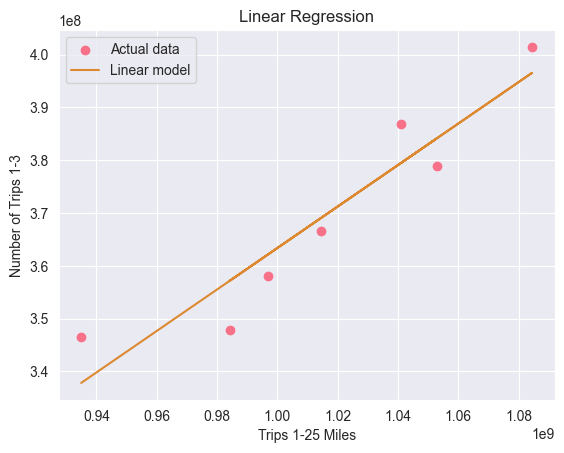

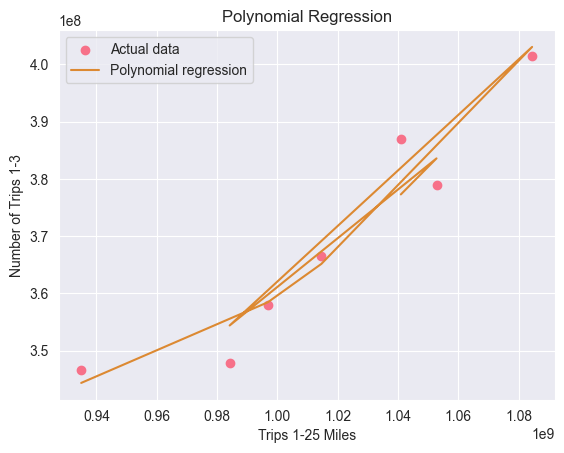

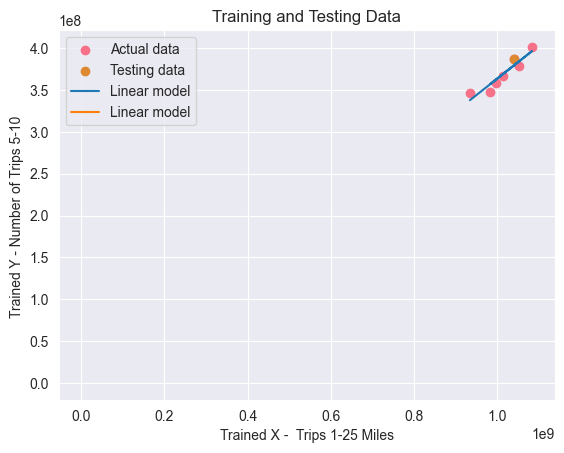

In [878]:
startDate = TripsFullDataPandasNationalOnly['Date'].min()
finishDate = TripsFullDataPandasNationalOnly['Date'].max()

TripsByDistancePandasNationalOnlyWeek31 = dd.from_pandas(TripsByDistancePandasNationalOnly, npartitions=2)
small_set = TripsByDistancePandasNationalOnlyWeek31[TripsByDistancePandasNationalOnlyWeek31["Date"].between(startDate, finishDate)].compute()


x_model = np.array(TripsFullDataPandasNationalOnlyQ4['Trips 1-25 Miles']).reshape(-1, 1)
y_model = np.array(small_set['Number of Trips 1-3']).reshape(-1, 1)


model = LinearRegression()
model.fit(x_model, y_model)


# Model evaluation
r_sq = model.score(x_model, y_model)
print(r_sq)
print(f"Coefficient of determination: {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

y_pred_linear = model.predict(x_model)
print(f"predicted response:\n{y_pred_linear}")

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_model)


model = LinearRegression()
model.fit(x_poly, y_model)

r_sq = model.score(x_poly, y_model)
print(f"Coefficient of determination (R^2): {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

y_pred = model.predict(x_poly)
print(f"predicted response:\n{y_pred_linear}")
# Model training 
X_train, X_test, y_train, y_test = train_test_split(x_model, y_model,shuffle=False)


plt.scatter(x_model, y_model, color=colors[0], label='Actual data')
plt.plot(x_model, y_pred_linear, color=colors[1], label='Linear model')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 1-3')
plt.title('Linear Regression')
plt.legend()
plt.savefig("./DataSources/GraphicalAnswers/LinearRegression.png")
plt.show()
plt.close('all')

plt.scatter(x_model, y_model, color=colors[0], label='Actual data')
plt.plot(x_model, y_pred, color=colors[1], label='Polynomial regression')
plt.xlabel('Trips 1-25 Miles')
plt.ylabel('Number of Trips 1-3')
plt.title('Polynomial Regression')
plt.legend()
plt.savefig("./DataSources/GraphicalAnswers/PolynomialRegression.png")
plt.show()
plt.close('all')



plt.scatter(x_model, y_model, color=colors[0], label='Actual data')
plt.scatter(X_test, y_test, color=colors[1], label='Testing data')
plt.plot(x_model, y_pred_linear, colors[2], label='Linear model')

plt.xlabel('Trained X -  Trips 1-25 Miles')
plt.ylabel('Trained Y - Number of Trips 5-10 ')
plt.title('Training and Testing Data')
plt.legend()
plt.savefig("./DataSources/GraphicalAnswers/TrainedValues.png")
plt.show()
plt.close('all')


e) Visualize the number of participants of travellers by distance-trips in plots and discuss the outcomes.

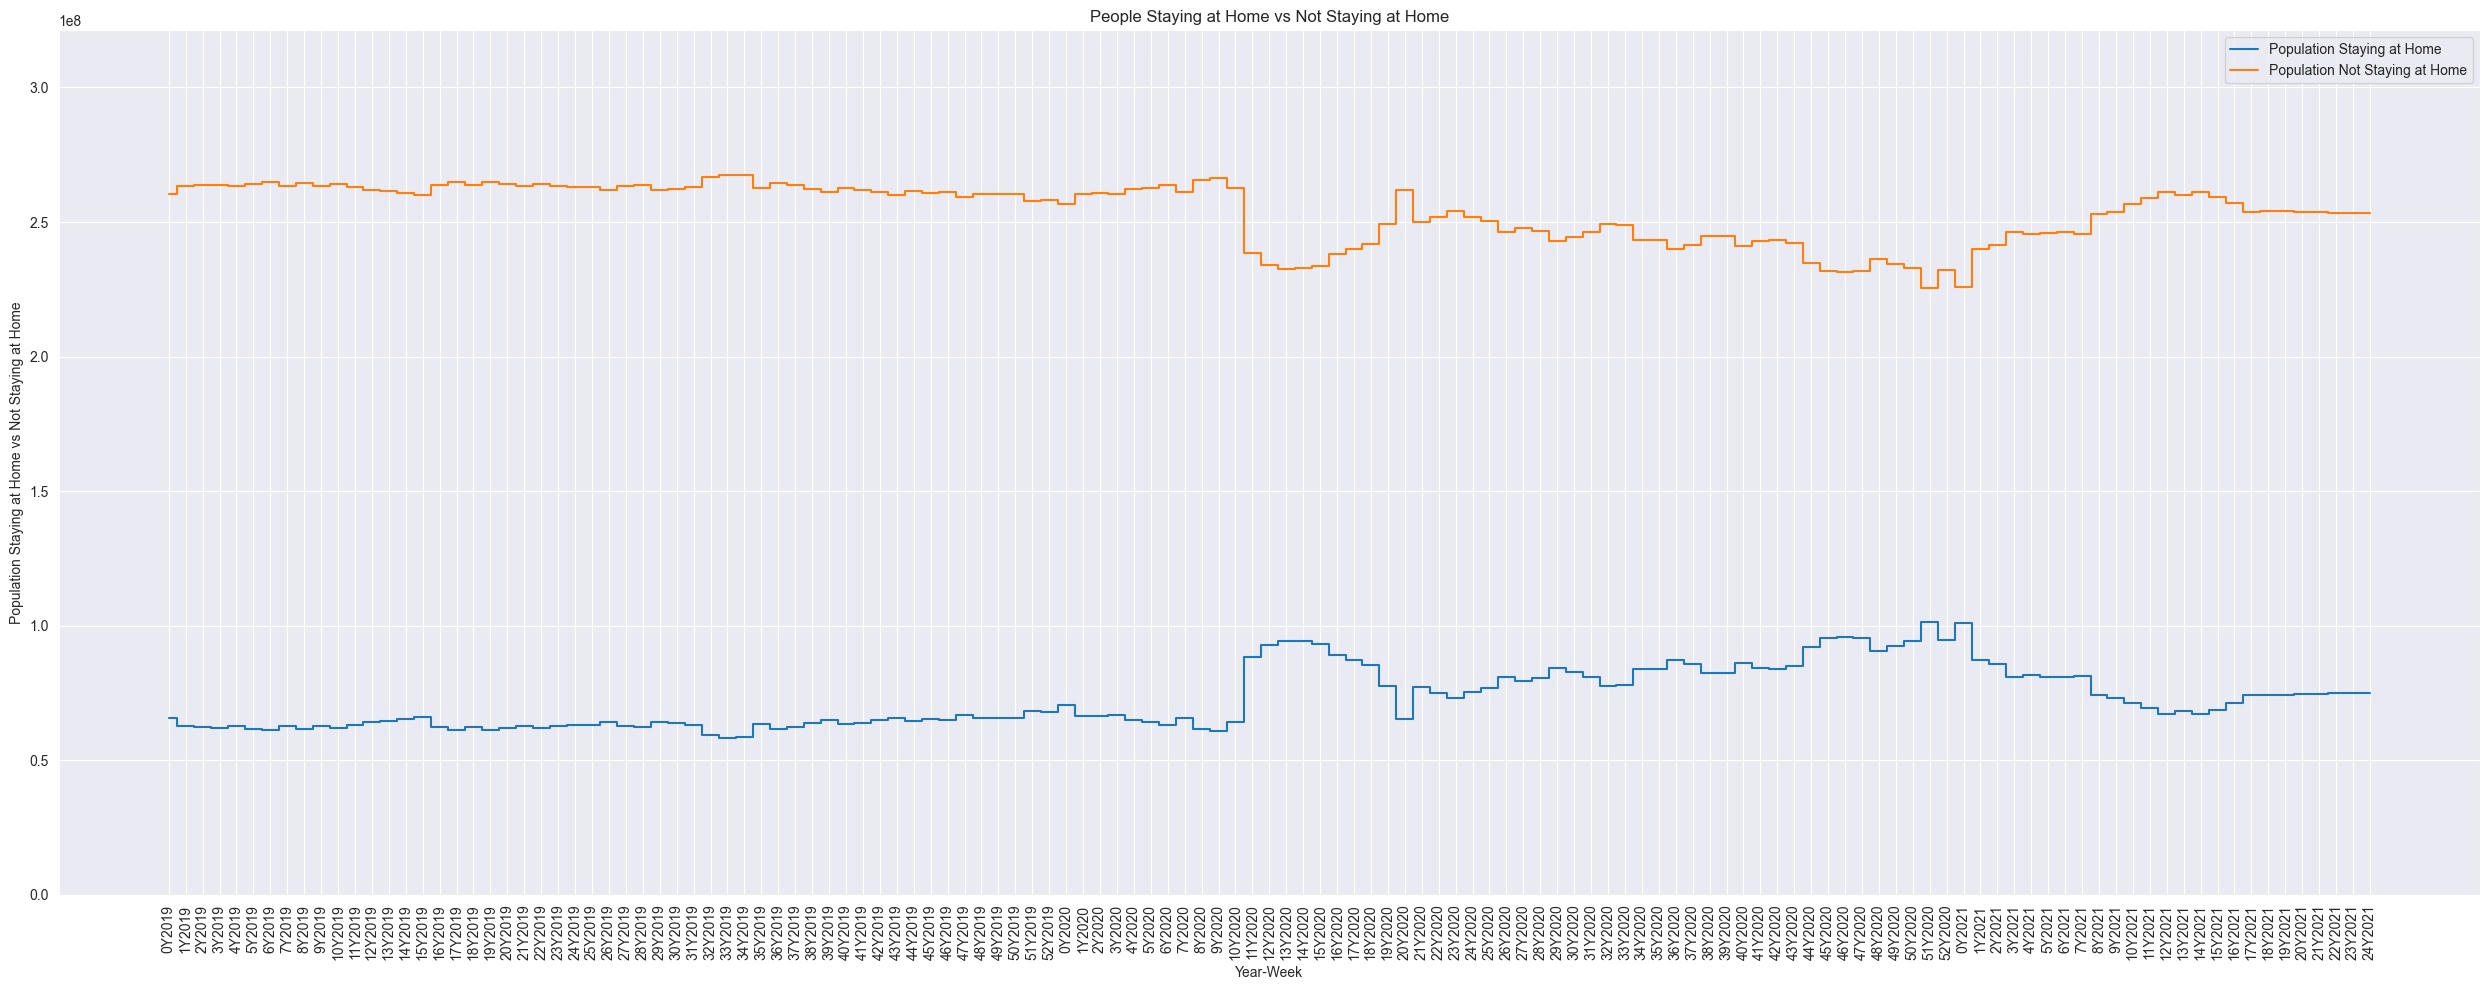

In [879]:
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5 = TripsByDistancePandasNationalOnly.groupby(
    [TripsByDistancePandasNationalOnly['Week'], TripsByDistancePandasNationalOnly['Year']]
)['Population Staying at Home'].mean().reset_index()

TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5.columns = ['Week', 'Year', 'Mean']
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5 = TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5.sort_values(['Year', 'Week'])
TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Week-Year'] = TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Week'].astype(str) + "Y" + TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Year'].astype(str)

TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5 = TripsByDistancePandasNationalOnly.groupby(
    [TripsByDistancePandasNationalOnly['Week'], TripsByDistancePandasNationalOnly['Year']]
)['Population Not Staying at Home'].mean().reset_index()

TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5.columns = ['Week', 'Year', 'Mean']
TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5 = TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5.sort_values(['Year', 'Week'])
TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Week-Year'] = TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Week'].astype(str) + "Y" + TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Year'].astype(str)

fig, ax = plt.subplots(figsize=(25, 10))

plt.step(
    TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Week-Year'],
    TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Mean'],
    where='mid',
    label='Population Staying at Home'
)

plt.step(
    TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Week-Year'],
    TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Mean'],
    where='mid',
    label='Population Not Staying at Home'
)

ax.set_ylim(0, max(
    TripsByDistancePandasNationalOnlyWeeklyPopulationAtHomeQ5['Mean'].max(),
    TripsByDistancePandasNationalOnlyWeeklyNotPopulationAtHomeQ5['Mean'].max()
) * 1.2)

ax.set_xlabel('Year-Week')
ax.set_ylabel('Population Staying at Home vs Not Staying at Home')
ax.set_title('People Staying at Home vs Not Staying at Home')
ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
plt.close('all')